In [529]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [530]:
df_price = pd.read_excel("data/Day-ahead_prices.xlsx")
df_price = df_price.drop(index=range(0, 8))
df_price = df_price.reset_index(drop=True)
new_header = df_price.iloc[0]
df_price = df_price[1:]
df_price.columns = new_header 
df_price.tail()

C:\Users\asus\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Start date,End date,Germany/Luxembourg [€/MWh],∅ DE/LU neighbours [€/MWh],Belgium [€/MWh],Denmark 1 [€/MWh],Denmark 2 [€/MWh],France [€/MWh],Netherlands [€/MWh],Norway 2 [€/MWh],Austria [€/MWh],Poland [€/MWh],Sweden 4 [€/MWh],Switzerland [€/MWh],Czech Republic [€/MWh],DE/AT/LU [€/MWh],Northern Italy [€/MWh],Slovenia [€/MWh],Hungary [€/MWh]
44996,"Feb 17, 2025 7:00 PM","Feb 17, 2025 8:00 PM",215.36,207.55,215.46,215.36,215.4,215.52,215.43,136.41,216.13,218.2,215.27,203.38,216.5,-,215.52,216.46,216.88
44997,"Feb 17, 2025 8:00 PM","Feb 17, 2025 9:00 PM",177.86,173.17,177.95,177.86,177.88,178,177.93,125.63,178.69,180.9,179.55,171.35,179.08,-,178,179.03,179.49
44998,"Feb 17, 2025 9:00 PM","Feb 17, 2025 10:00 PM",155.19,152.2,155.38,155.19,155.2,155.62,155.3,116.26,159.84,154.09,155.93,159.98,151.4,-,160,161.59,166.68
44999,"Feb 17, 2025 10:00 PM","Feb 17, 2025 11:00 PM",139.39,137.86,139.51,139.39,139.4,140,139.39,107.73,150.02,137.24,136.05,156.48,131.21,-,153.72,153.72,164.94
45000,"Feb 17, 2025 11:00 PM","Feb 18, 2025 12:00 AM",129.57,129.34,130,129.57,129.56,130.6,129.72,111.25,134.93,127.68,126.77,149.67,122.95,-,147.26,140.81,149.69


In [531]:
df_consum = pd.read_excel("data/Actual_consumption.xlsx")
df_consum = df_consum.drop(index=range(0, 8))
df_consum = df_consum.reset_index(drop=True)
new_header = df_consum.iloc[0]
df_consum = df_consum[1:]
df_consum.columns = new_header
df_consum.head()

C:\Users\asus\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Start date,End date,grid load [MWh],Grid load incl. hydro pumped storage [MWh],Hydro pumped storage [MWh],Residual load [MWh]
1,"Jan 1, 2020 12:00 AM","Jan 1, 2020 1:00 AM",43968.5,44244.25,275.75,37334.25
2,"Jan 1, 2020 1:00 AM","Jan 1, 2020 2:00 AM",43047,43528.75,481.75,35991
3,"Jan 1, 2020 2:00 AM","Jan 1, 2020 3:00 AM",41895,42576.5,681.5,34458
4,"Jan 1, 2020 3:00 AM","Jan 1, 2020 4:00 AM",40701.75,41453,751.25,33152
5,"Jan 1, 2020 4:00 AM","Jan 1, 2020 5:00 AM",40681.25,42153.25,1472,32930.75


In [532]:
df_consum.drop(columns={'Hydro pumped storage [MWh]'},inplace=True)

In [533]:
df_consum.tail()

,Start date,End date,grid load [MWh],Grid load incl. hydro pumped storage [MWh],Residual load [MWh]
44996,"Feb 17, 2025 7:00 PM","Feb 17, 2025 8:00 PM",69697.25,69702.5,63404
44997,"Feb 17, 2025 8:00 PM","Feb 17, 2025 9:00 PM",66565.5,66592,60146
44998,"Feb 17, 2025 9:00 PM","Feb 17, 2025 10:00 PM",63781.25,63789.5,57530.25
44999,"Feb 17, 2025 10:00 PM","Feb 17, 2025 11:00 PM",61239.5,61308.25,55342.25
45000,"Feb 17, 2025 11:00 PM","Feb 18, 2025 12:00 AM",58464.25,58632.5,52697.75


In [534]:
def convert_to_float(x):
    try:
        return float(x)
    except ValueError:
        return np.nan
    
columns_to_convert = ['grid load [MWh]', 'Residual load [MWh]']
for col in columns_to_convert:
    df_consum[col] = df_consum[col].apply(convert_to_float)

In [535]:
df_generate = pd.read_excel("data/Actual_generation.xlsx")
df_generate = df_generate.drop(index=range(0, 8))
df_generate = df_generate.reset_index(drop=True)
new_header = df_generate.iloc[0]
df_generate = df_generate[1:]
df_generate.columns = new_header

C:\Users\asus\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [536]:
columns_to_convert = ['Biomass [MWh]','Hydropower [MWh]','Wind offshore [MWh]','Wind onshore [MWh]','Photovoltaics [MWh]','Other renewable [MWh]','Nuclear [MWh]','Lignite [MWh]','Hard coal [MWh]','Fossil gas [MWh]','Hydro pumped storage [MWh]','Other conventional [MWh]']
for col in columns_to_convert:
    df_generate[col] = df_generate[col].apply(convert_to_float)

In [537]:
df_generate.tail(24)

,Start date,End date,Biomass [MWh],Hydropower [MWh],Wind offshore [MWh],Wind onshore [MWh],Photovoltaics [MWh],Other renewable [MWh],Nuclear [MWh],Lignite [MWh],Hard coal [MWh],Fossil gas [MWh],Hydro pumped storage [MWh],Other conventional [MWh]
44977,"Feb 17, 2025 12:00 AM","Feb 17, 2025 1:00 AM",4289.25,1218.75,883.25,7221.00,0.00,113.00,NaN,10626.00,8033.25,10813.50,29.25,1474.50
44978,"Feb 17, 2025 1:00 AM","Feb 17, 2025 2:00 AM",4276.50,1219.50,615.25,6920.50,0.00,113.00,NaN,10621.00,7980.00,10629.75,19.25,1467.75
44979,"Feb 17, 2025 2:00 AM","Feb 17, 2025 3:00 AM",4264.00,1206.25,459.00,6327.00,0.00,113.00,NaN,10610.75,7967.25,10962.00,22.50,1465.00
44980,"Feb 17, 2025 3:00 AM","Feb 17, 2025 4:00 AM",4211.00,1196.25,309.00,5993.25,0.00,113.00,NaN,10600.00,7949.75,11476.75,4.50,1469.50
44981,"Feb 17, 2025 4:00 AM","Feb 17, 2025 5:00 AM",4209.50,1200.50,357.75,5763.00,0.00,113.00,NaN,10604.00,8017.00,12361.00,34.50,1467.25
44982,"Feb 17, 2025 5:00 AM","Feb 17, 2025 6:00 AM",4185.25,1196.75,494.75,5674.00,0.00,117.50,NaN,10820.00,8063.50,14722.75,135.25,1462.25
44983,"Feb 17, 2025 6:00 AM","Feb 17, 2025 7:00 AM",4176.25,1330.75,640.75,5804.50,0.00,119.00,NaN,11026.00,7885.25,16852.75,2102.75,1458.25
44984,"Feb 17, 2025 7:00 AM","Feb 17, 2025 8:00 AM",4198.75,1721.00,689.50,5550.75,456.25,119.00,NaN,10996.00,7840.00,17632.75,5914.50,1602.00
44985,"Feb 17, 2025 8:00 AM","Feb 17, 2025 9:00 AM",4239.50,1565.50,762.75,4784.00,5596.00,115.50,NaN,11280.75,7868.25,17858.00,5679.75,1588.50
44986,"Feb 17, 2025 9:00 AM","Feb 17, 2025 10:00 AM",4237.25,1355.50,795.75,2917.50,14742.50,112.00,NaN,11624.25,7873.25,16213.50,2600.50,1447.25


In [538]:
cols_renew = ['Biomass [MWh]','Hydropower [MWh]','Other renewable [MWh]','Hydro pumped storage [MWh]']
cols_nonrenew = ['Nuclear [MWh]','Lignite [MWh]','Hard coal [MWh]','Fossil gas [MWh]','Other conventional [MWh]']
df_generate['Renewable Energy'] = df_generate.drop(columns=['Start date', 'End date'])[cols_renew].sum(axis=1)
df_generate['Non-Renewable Energy'] = df_generate.drop(columns=['Start date', 'End date'])[cols_nonrenew].sum(axis=1)

In [539]:
df_generation = df_generate[['Start date', 'End date', 'Renewable Energy', 'Non-Renewable Energy']]

In [540]:
df_generation.tail()

,Start date,End date,Renewable Energy,Non-Renewable Energy
44996,"Feb 17, 2025 7:00 PM","Feb 17, 2025 8:00 PM",11206.25,41020.50
44997,"Feb 17, 2025 8:00 PM","Feb 17, 2025 9:00 PM",9875.00,39690.00
44998,"Feb 17, 2025 9:00 PM","Feb 17, 2025 10:00 PM",7901.25,38840.25
44999,"Feb 17, 2025 10:00 PM","Feb 17, 2025 11:00 PM",6492.75,38397.00
45000,"Feb 17, 2025 11:00 PM","Feb 18, 2025 12:00 AM",6047.50,36977.75


In [541]:
df_merge = pd.merge(df_consum,df_price[['Start date','Germany/Luxembourg [€/MWh]']],on = 'Start date')
df = pd.merge(df_generation,df_merge[['Start date','Germany/Luxembourg [€/MWh]','grid load [MWh]','Residual load [MWh]']],on = 'Start date')
df = df.rename(columns={'grid load [MWh]': 'Total Grid','Germany/Luxembourg [€/MWh]':'Germany Prices','Residual load [MWh]':'Residual Load'})
df['Start date'] = pd.to_datetime(df['Start date'])
df["Year"] = pd.to_datetime(df["Start date"]).dt.year
df['Date'] = pd.to_datetime(df['Start date'], format='%Y-%m-%d',errors='coerce').dt.date
df['Time'] = pd.to_datetime(df['Start date'],format='%H:%M:%S').dt.time
df["Month"] = pd.to_datetime(df["Start date"]).dt.month
df["Day"] = pd.to_datetime(df["Start date"]).dt.day_name()
war_start_date = pd.Timestamp("2022-02-24")
df["War Indicator"] = (df["Start date"] >= war_start_date).astype(int)
df.drop(columns={'End date'},inplace=True)
df.set_index('Start date',inplace=True)
df.index = pd.to_datetime(df.index, errors='coerce')
df['Germany Prices'] = pd.to_numeric(df['Germany Prices'], errors='coerce')
df.head(5)

C:\Users\asus\AppData\Local\Temp\ipykernel_13056\1287696020.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Start date'] = pd.to_datetime(df['Start date'])


,Renewable Energy,Non-Renewable Energy,Germany Prices,Total Grid,Residual Load,Year,Date,Time,Month,Day,War Indicator
Start date,,,,,,,,,,,
2020-01-01 00:00:00,7317.50,27179.25,41.88,43968.50,37334.25,2020,2020-01-01,00:00:00,1,Wednesday,0
2020-01-01 01:00:00,7181.75,26756.00,38.60,43047.00,35991.00,2020,2020-01-01,01:00:00,1,Wednesday,0
2020-01-01 02:00:00,8823.25,26526.75,36.55,41895.00,34458.00,2020,2020-01-01,02:00:00,1,Wednesday,0
2020-01-01 03:00:00,8958.50,26713.00,32.32,40701.75,33152.00,2020,2020-01-01,03:00:00,1,Wednesday,0
2020-01-01 04:00:00,8645.00,26713.00,30.85,40681.25,32930.75,2020,2020-01-01,04:00:00,1,Wednesday,0


In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45030 entries, 2020-01-01 00:00:00 to 2025-02-17 23:00:00
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Renewable Energy      45030 non-null  float64
 1   Non-Renewable Energy  45030 non-null  float64
 2   Germany Prices        45030 non-null  float64
 3   Total Grid            45030 non-null  float64
 4   Residual Load         45030 non-null  float64
 5   Year                  45030 non-null  int32  
 6   Date                  45030 non-null  object 
 7   Time                  45030 non-null  object 
 8   Month                 45030 non-null  int32  
 9   Day                   45030 non-null  object 
 10  War Indicator         45030 non-null  int32  
dtypes: float64(5), int32(3), object(3)
memory usage: 3.6+ MB


In [543]:
df.describe()

,Renewable Energy,Non-Renewable Energy,Germany Prices,Total Grid,Residual Load,Year,Month,War Indicator
count,45030.000000,45030.000000,45030.000000,45030.000000,45030.000000,45030.000000,45030.000000,45030.000000
mean,7365.019953,26497.948593,107.609396,55313.701255,34349.162264,2022.076749,6.391983,0.581346
std,1580.674878,10149.492236,103.471351,9765.355635,13470.137064,1.474914,3.502178,0.493344
min,3995.750000,6551.500000,-500.000000,31278.250000,-8035.000000,2020.000000,1.000000,0.000000
25%,6166.500000,18612.875000,42.060000,47385.875000,25294.125000,2021.000000,3.000000,0.000000
50%,6904.500000,26096.125000,83.050000,55237.125000,34714.125000,2022.000000,6.000000,1.000000
75%,8185.250000,33547.687500,130.447500,62810.500000,43621.750000,2023.000000,9.000000,1.000000
max,14733.500000,59324.750000,936.280000,82115.750000,73031.500000,2025.000000,12.000000,1.000000


# EDA

In [544]:
duplicates = df.index.duplicated()
print(df.index[duplicates])
df = df[~df.index.duplicated(keep='first')]

DatetimeIndex(['2020-10-25 02:00:00', '2020-10-25 02:00:00',
               '2020-10-25 02:00:00', '2020-10-25 02:00:00',
               '2020-10-25 02:00:00', '2020-10-25 02:00:00',
               '2020-10-25 02:00:00', '2021-10-31 02:00:00',
               '2021-10-31 02:00:00', '2021-10-31 02:00:00',
               '2021-10-31 02:00:00', '2021-10-31 02:00:00',
               '2021-10-31 02:00:00', '2021-10-31 02:00:00',
               '2022-10-30 02:00:00', '2022-10-30 02:00:00',
               '2022-10-30 02:00:00', '2022-10-30 02:00:00',
               '2022-10-30 02:00:00', '2022-10-30 02:00:00',
               '2022-10-30 02:00:00', '2023-10-29 02:00:00',
               '2023-10-29 02:00:00', '2023-10-29 02:00:00',
               '2023-10-29 02:00:00', '2023-10-29 02:00:00',
               '2023-10-29 02:00:00', '2023-10-29 02:00:00',
               '2024-10-27 02:00:00', '2024-10-27 02:00:00',
               '2024-10-27 02:00:00', '2024-10-27 02:00:00',
               '2024-10-

In [545]:
df.isna().sum()

0
Renewable Energy        0
Non-Renewable Energy    0
Germany Prices          0
Total Grid              0
Residual Load           0
Year                    0
Date                    0
Time                    0
Month                   0
Day                     0
War Indicator           0
dtype: int64

In [546]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44995 entries, 2020-01-01 00:00:00 to 2025-02-17 23:00:00
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Renewable Energy      44995 non-null  float64
 1   Non-Renewable Energy  44995 non-null  float64
 2   Germany Prices        44995 non-null  float64
 3   Total Grid            44995 non-null  float64
 4   Residual Load         44995 non-null  float64
 5   Year                  44995 non-null  int32  
 6   Date                  44995 non-null  object 
 7   Time                  44995 non-null  object 
 8   Month                 44995 non-null  int32  
 9   Day                   44995 non-null  object 
 10  War Indicator         44995 non-null  int32  
dtypes: float64(5), int32(3), object(3)
memory usage: 3.6+ MB


In [547]:
columns_na = ['Total Grid', 'Residual Load', 'Renewable Energy', 'Non-Renewable Energy','Germany Prices']
df[columns_na] = df[columns_na].apply(lambda col: col.fillna(col.mean()))

In [548]:
df.isna().sum()

0
Renewable Energy        0
Non-Renewable Energy    0
Germany Prices          0
Total Grid              0
Residual Load           0
Year                    0
Date                    0
Time                    0
Month                   0
Day                     0
War Indicator           0
dtype: int64

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


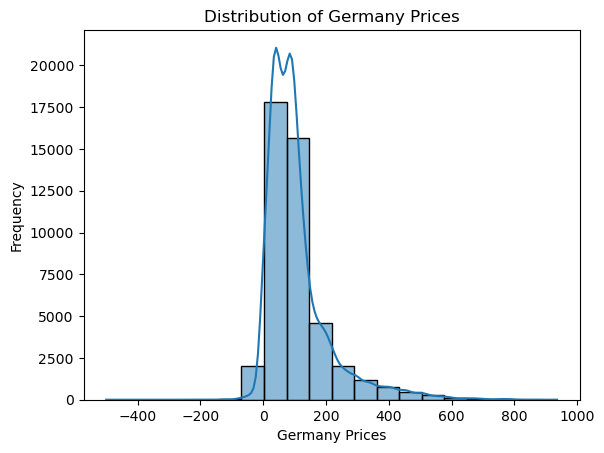

In [549]:
sns.histplot(df['Germany Prices'], bins=20, kde=True)
plt.title("Distribution of Germany Prices")
plt.xlabel("Germany Prices")
plt.ylabel("Frequency")
plt.show()

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


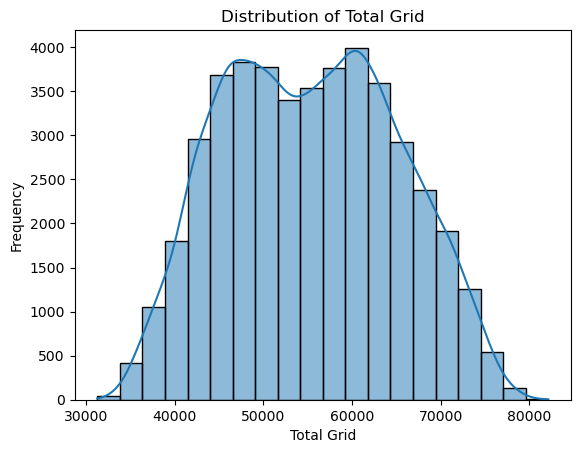

In [550]:
sns.histplot(df['Total Grid'], bins=20, kde=True)
plt.title("Distribution of Total Grid")
plt.xlabel("Total Grid")
plt.ylabel("Frequency")
plt.show()

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


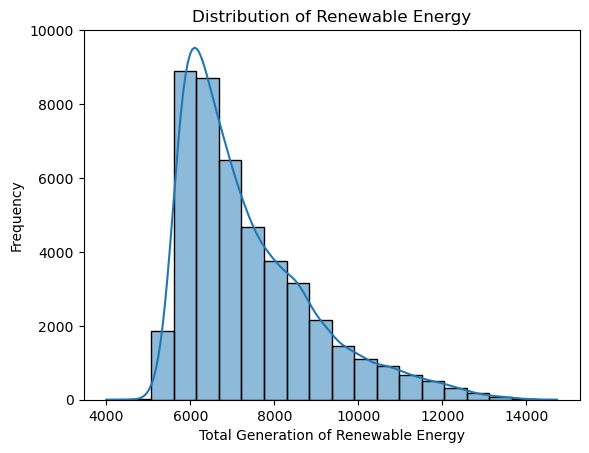

In [551]:
sns.histplot(df['Renewable Energy'], bins=20, kde=True)
plt.title("Distribution of Renewable Energy")
plt.xlabel("Total Generation of Renewable Energy")
plt.ylabel("Frequency")
plt.show()

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


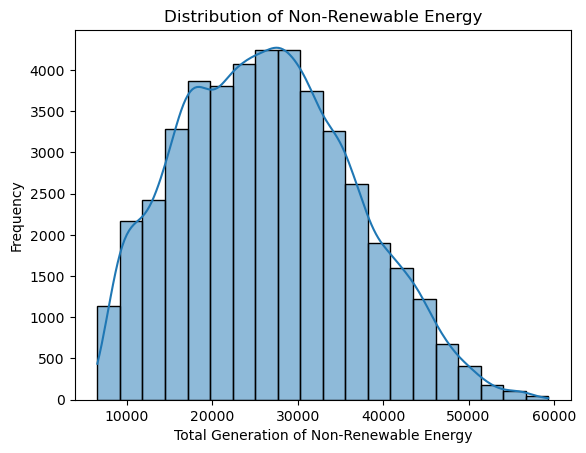

In [552]:
sns.histplot(df['Non-Renewable Energy'], bins=20, kde=True)
plt.title("Distribution of Non-Renewable Energy")
plt.xlabel("Total Generation of Non-Renewable Energy")
plt.ylabel("Frequency")
plt.show()

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

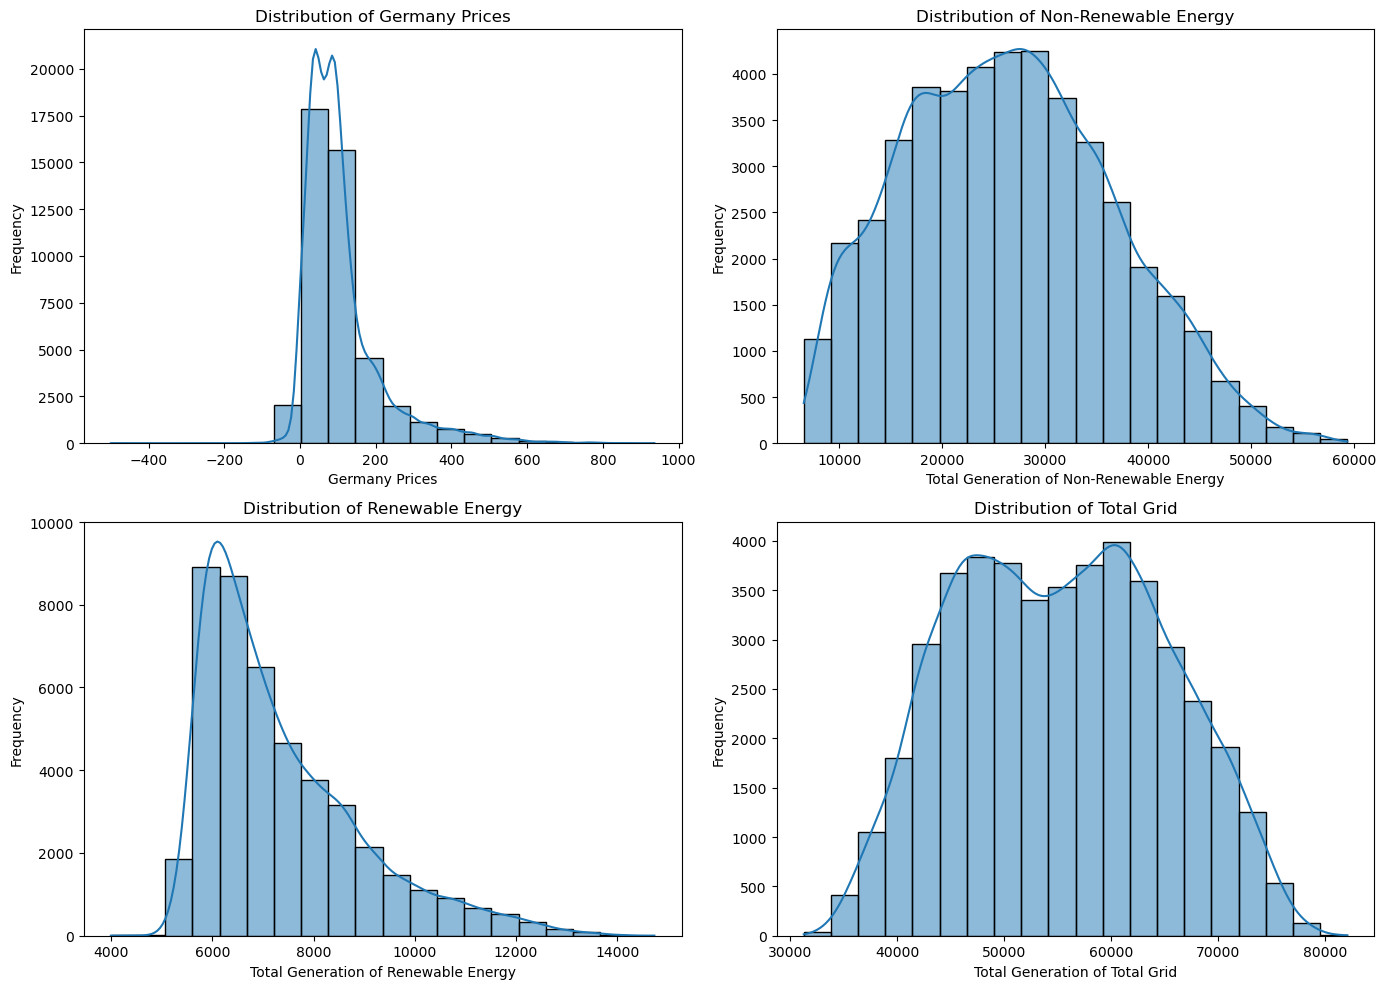

In [553]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# Plot 1: Distribution of Germany Prices
sns.histplot(df['Germany Prices'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Germany Prices")
axes[0, 0].set_xlabel("Germany Prices")
axes[0, 0].set_ylabel("Frequency")

# Plot 2: Distribution of Non-Renewable Energy
sns.histplot(df['Non-Renewable Energy'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Non-Renewable Energy")
axes[0, 1].set_xlabel("Total Generation of Non-Renewable Energy")
axes[0, 1].set_ylabel("Frequency")

# Plot 3: Distribution of Renewable Energy
sns.histplot(df['Renewable Energy'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Renewable Energy")
axes[1, 0].set_xlabel("Total Generation of Renewable Energy")
axes[1, 0].set_ylabel("Frequency")

# Plot 4: Distribution of Total Grid
sns.histplot(df['Total Grid'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Total Grid")
axes[1, 1].set_xlabel("Total Generation of Total Grid")
axes[1, 1].set_ylabel("Frequency")

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

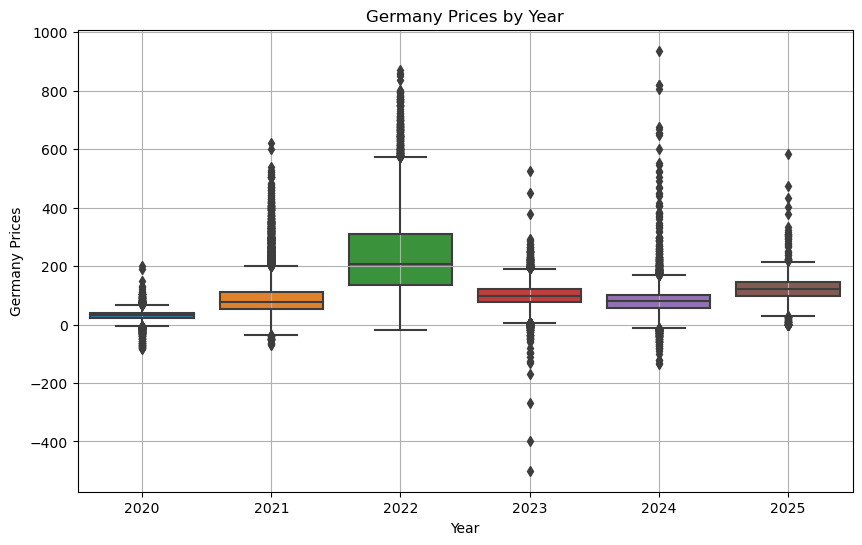

In [554]:
df['Year'] = df['Year'].astype(str)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Germany Prices', data=df)
plt.title('Germany Prices by Year')
plt.xlabel('Year')
plt.ylabel('Germany Prices')
plt.grid(True)
plt.show()

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


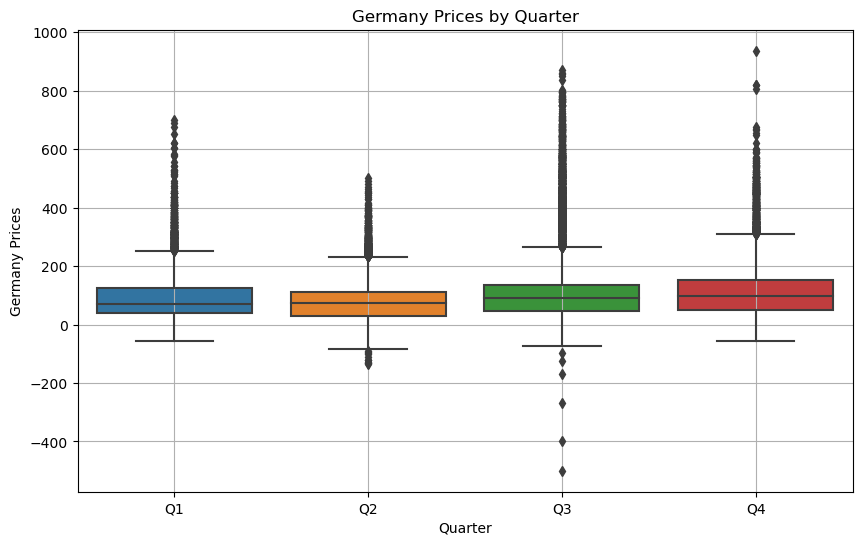

In [555]:
df['Quarter'] = pd.cut(df['Month'], bins=[0, 3, 6, 9, 12], labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quarter', y='Germany Prices', data=df)
plt.title('Germany Prices by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Germany Prices')
plt.grid(True)
plt.show()

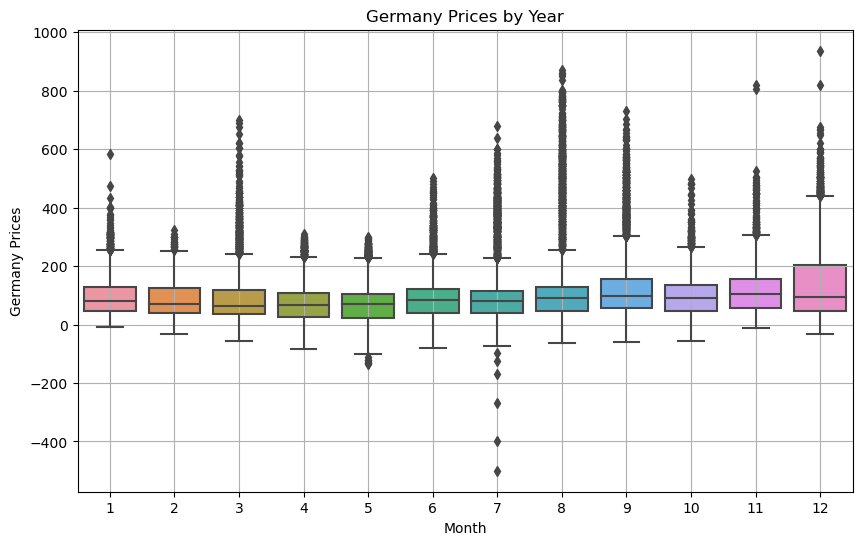

In [556]:
df['Month'] = df['Month'].astype(str)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Germany Prices', data=df)
plt.title('Germany Prices by Year')
plt.xlabel('Month')
plt.ylabel('Germany Prices')
plt.grid(True)
plt.show()

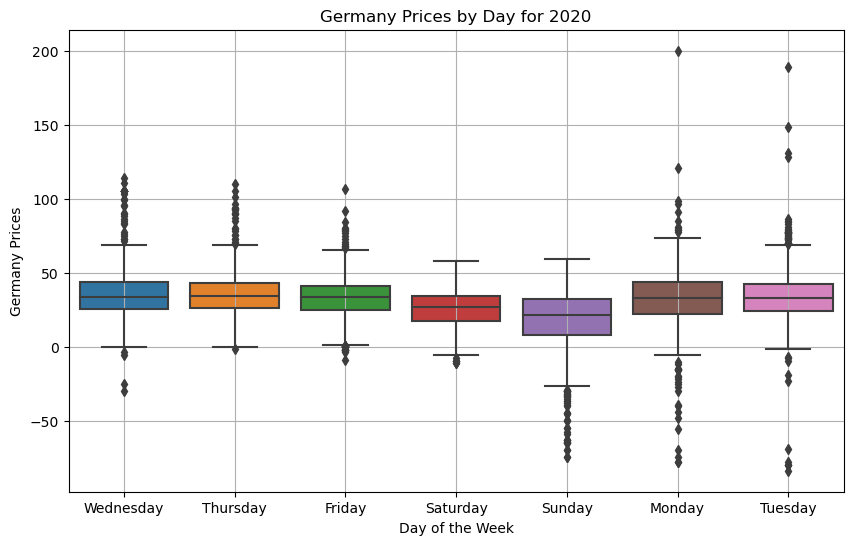

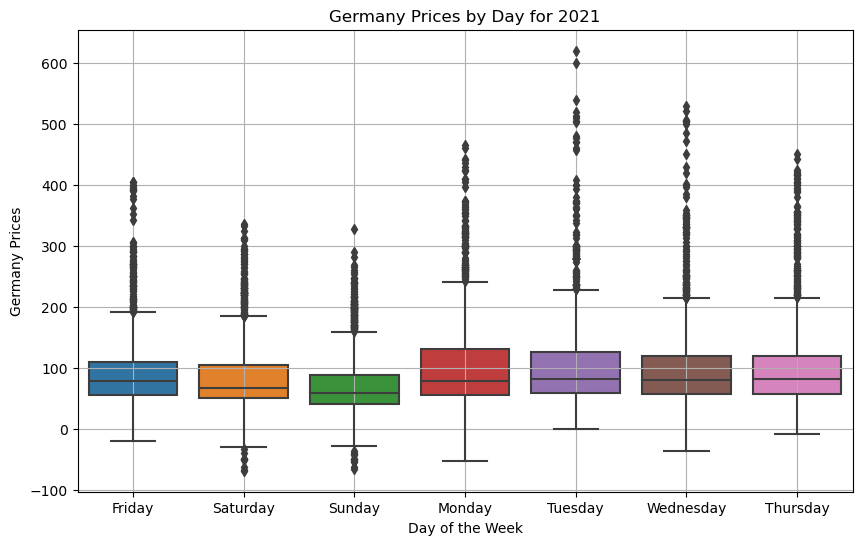

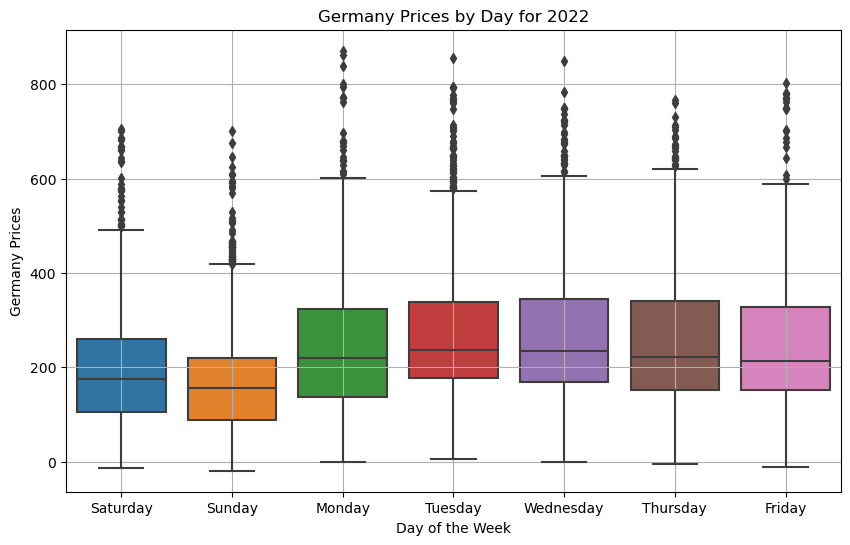

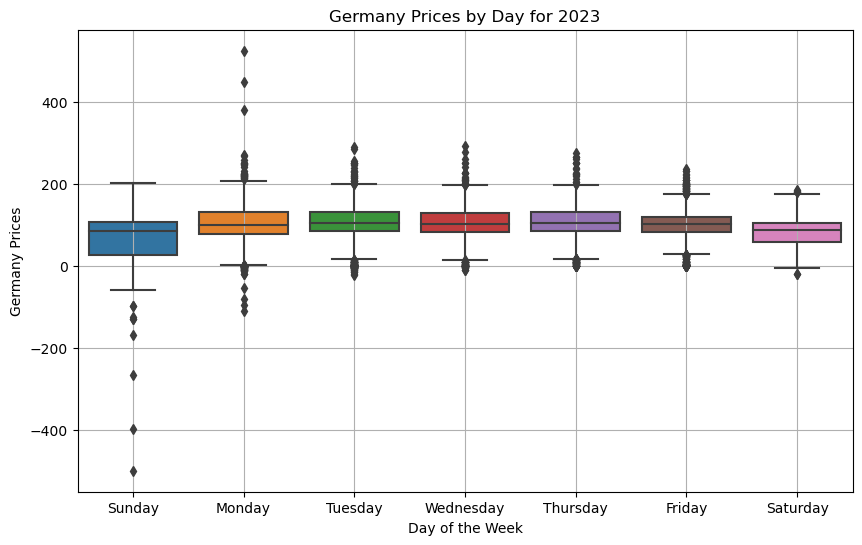

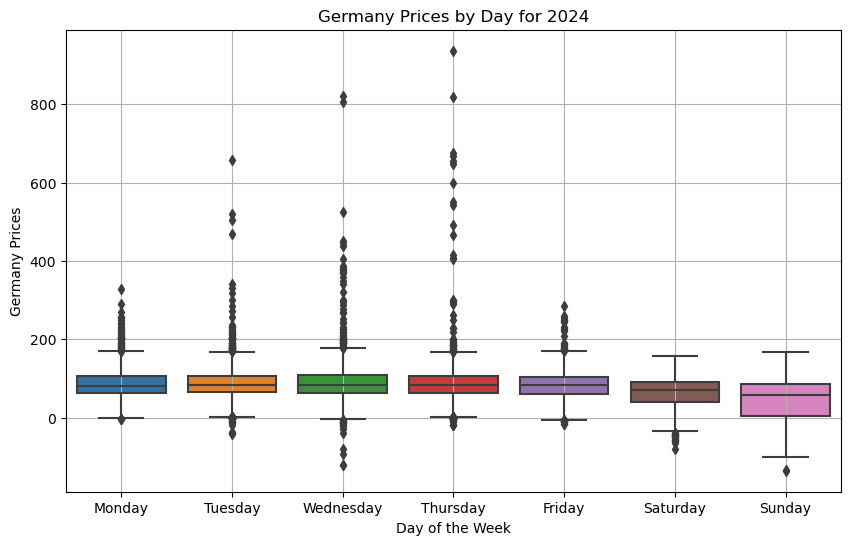

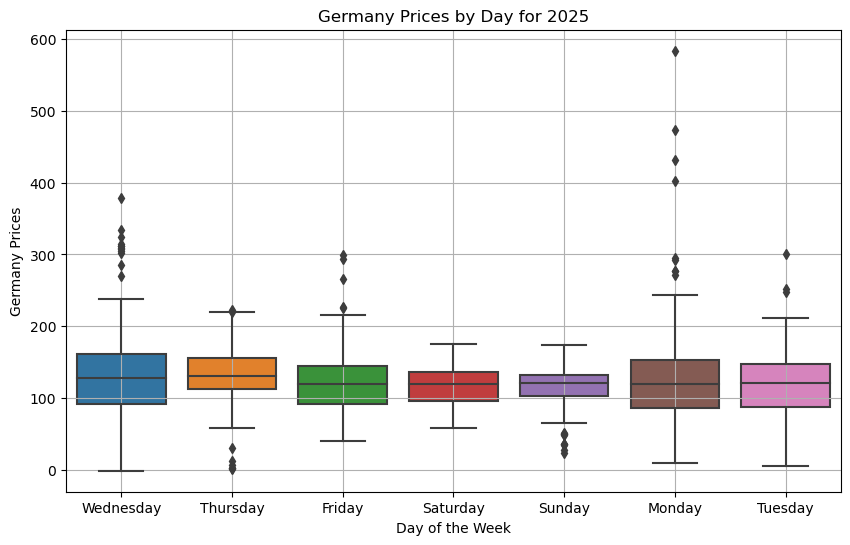

In [557]:
grouped = df.groupby(['Year', 'Day'])
unique_years = df['Year'].unique()

for year in unique_years:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Day', y='Germany Prices', data=df[df['Year'] == year])
    plt.title(f'Germany Prices by Day for {year}')
    plt.xlabel('Day of the Week')
    plt.ylabel('Germany Prices')
    plt.grid(True)
    plt.show()

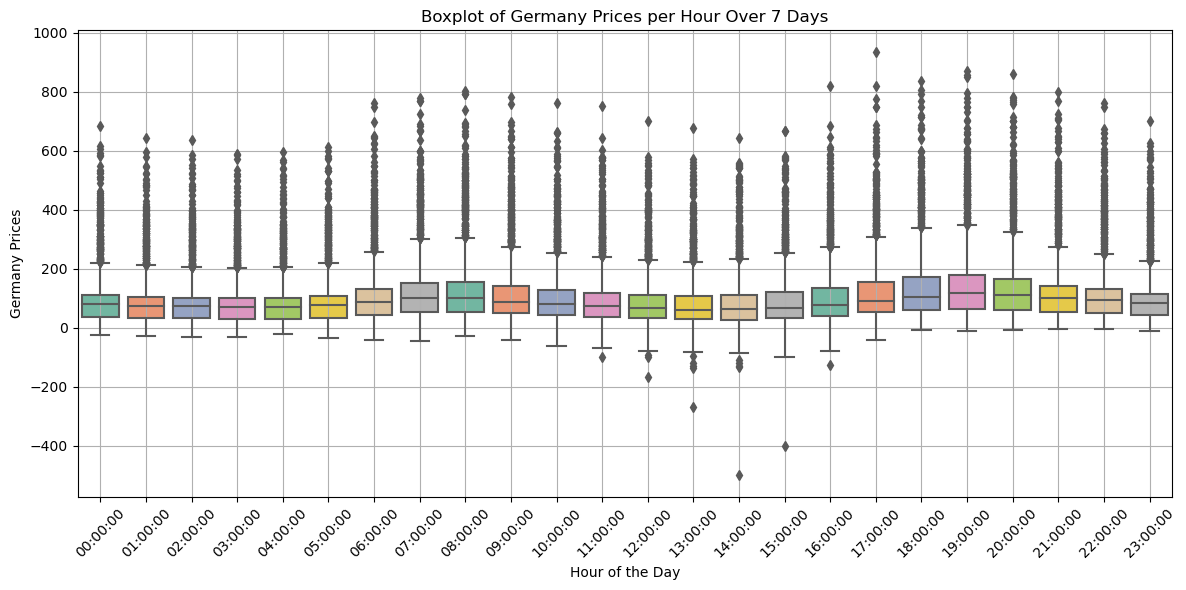

In [558]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Time', y='Germany Prices', data=df, palette='Set2')

plt.xlabel('Hour of the Day')
plt.ylabel('Germany Prices')
plt.title('Boxplot of Germany Prices per Hour Over 7 Days')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

In [559]:
daily_prices = df['Germany Prices'].resample('D').mean()
monthly_prices = df['Germany Prices'].resample('M').mean()

C:\Users\asus\AppData\Local\Temp\ipykernel_13056\3376381666.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_prices = df['Germany Prices'].resample('M').mean()


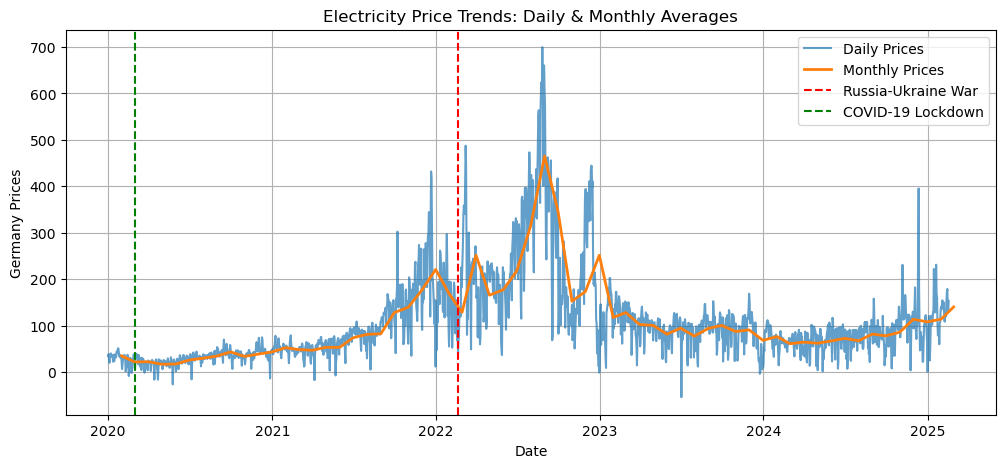

In [560]:
plt.figure(figsize=(12, 5))
plt.plot(daily_prices, label="Daily Prices", alpha=0.7)
plt.plot(monthly_prices, label="Monthly Prices", linewidth=2)
plt.axvline(pd.Timestamp("2022-02-20"), color='r', linestyle="--", label="Russia-Ukraine War")
plt.axvline(pd.Timestamp("2020-03-01"), color='g', linestyle="--", label="COVID-19 Lockdown")
plt.legend()
plt.title("Electricity Price Trends: Daily & Monthly Averages")
plt.xlabel("Date")
plt.ylabel("Germany Prices")
plt.grid()
plt.show()

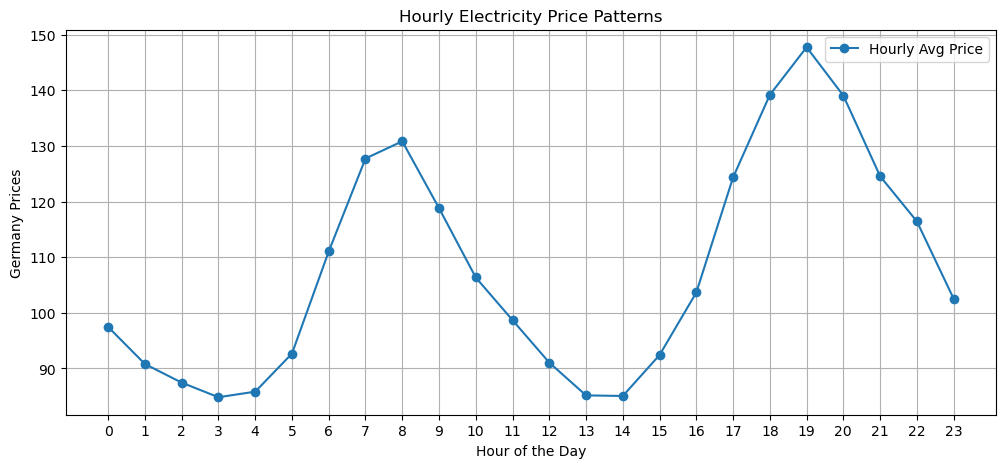

In [561]:
# Hourly and Weekly Pattern Analysis
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.dayofweek
df['Month'] = df.index.month
# Average price by hour
hourly_avg_price = df.groupby('Hour')['Germany Prices'].mean()

# Average price by day of the week
weekly_avg_price = df.groupby('DayOfWeek')['Germany Prices'].mean()

monthly_avg_price = df.groupby('Month')['Germany Prices'].mean()
# Plot hourly pattern
plt.figure(figsize=(12, 5))
plt.plot(hourly_avg_price, marker='o', label="Hourly Avg Price")
plt.xticks(range(0, 24))
plt.title("Hourly Electricity Price Patterns")
plt.xlabel("Hour of the Day")
plt.ylabel("Germany Prices")
plt.grid()
plt.legend()
plt.show()

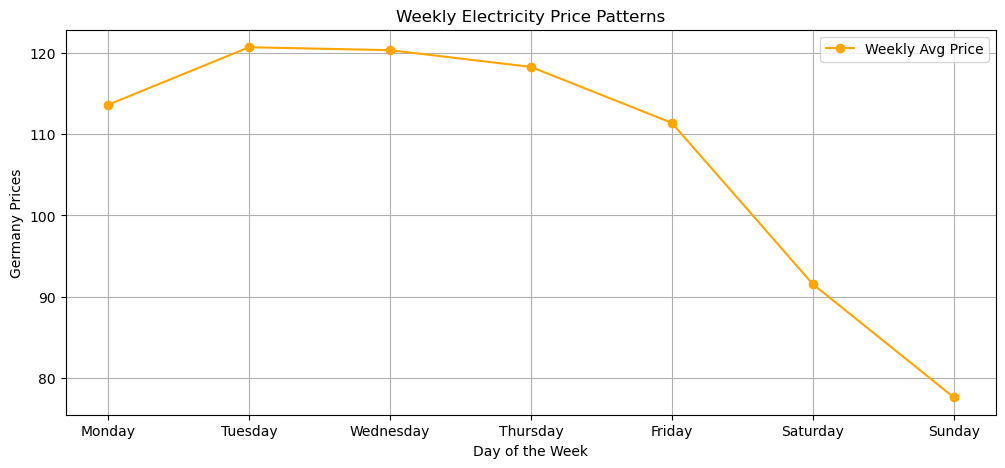

In [562]:
plt.figure(figsize=(12, 5))
plt.plot(weekly_avg_price, marker='o', color='orange', label="Weekly Avg Price")
plt.xticks(range(0, 7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Weekly Electricity Price Patterns")
plt.xlabel("Day of the Week")
plt.ylabel("Germany Prices")
plt.grid()
plt.legend()
plt.show()

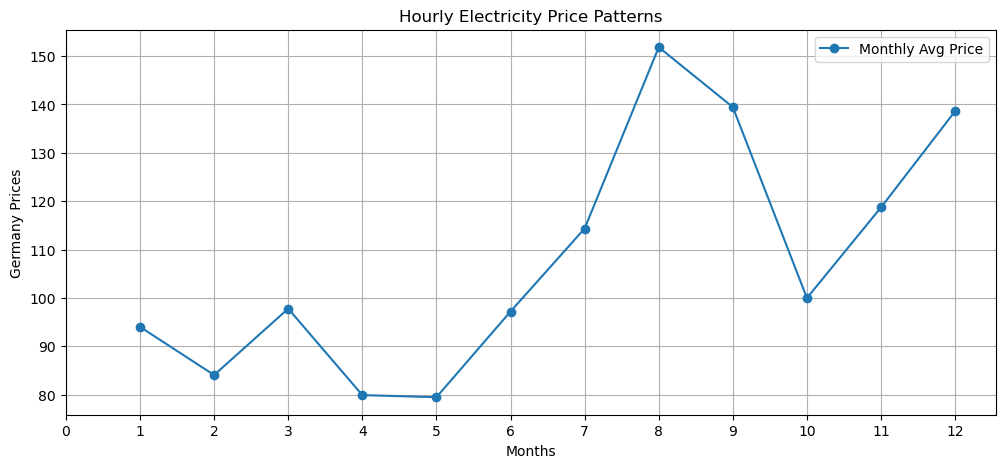

In [563]:
# Plot hourly pattern
plt.figure(figsize=(12, 5))
plt.plot(monthly_avg_price, marker='o', label="Monthly Avg Price")
plt.xticks(range(0, 13))
plt.title("Hourly Electricity Price Patterns")
plt.xlabel("Months")
plt.ylabel("Germany Prices")
plt.grid()
plt.legend()
plt.show()

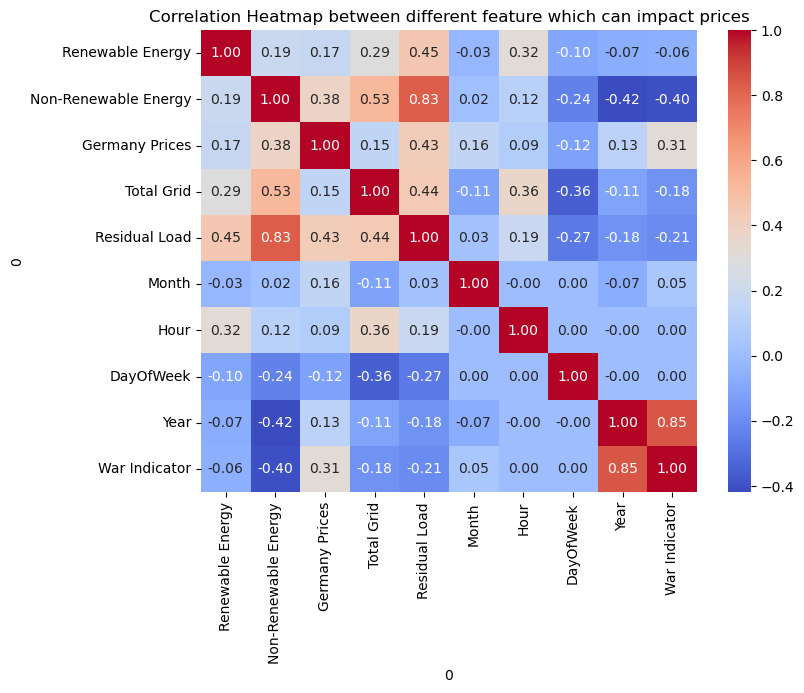

In [564]:
correlation_matrix = df[['Renewable Energy', 'Non-Renewable Energy','Germany Prices','Total Grid','Residual Load','Month','Hour','DayOfWeek','Year','War Indicator']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap between different feature which can impact prices")
plt.show()

# Dealing with outliers

Text(0.5, 1.0, 'Renewable Energy')

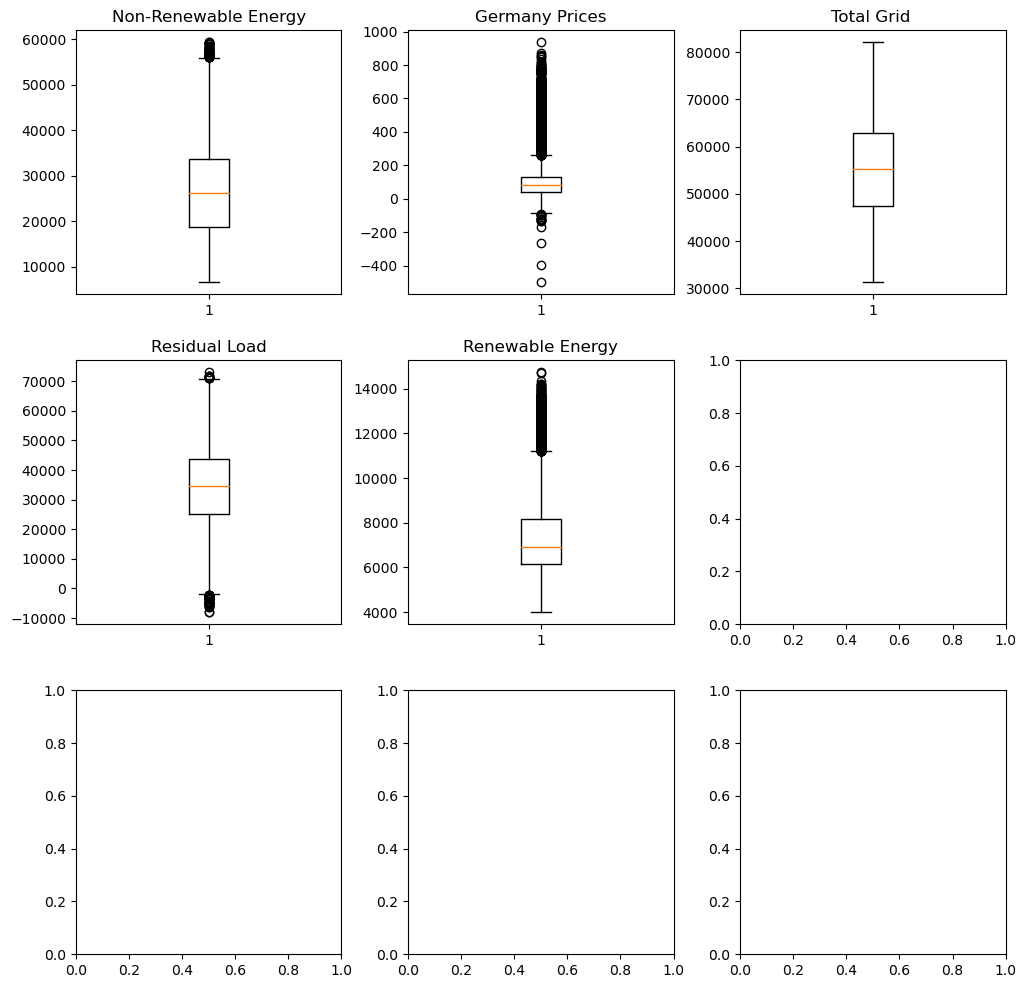

In [565]:
fig, ax = plt.subplots(3,3,figsize=(12,12))
fig.subplots_adjust(wspace=0.25, hspace=0.25)

ax[0][0].boxplot(df['Non-Renewable Energy'])
ax[0][0].set_title('Non-Renewable Energy')

ax[0][1].boxplot(df['Germany Prices'])
ax[0][1].set_title('Germany Prices')

ax[0][2].boxplot(df['Total Grid'])
ax[0][2].set_title('Total Grid ')

ax[1][0].boxplot(df['Residual Load'])
ax[1][0].set_title('Residual Load')

ax[1][1].boxplot(df['Renewable Energy'])
ax[1][1].set_title('Renewable Energy')




C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

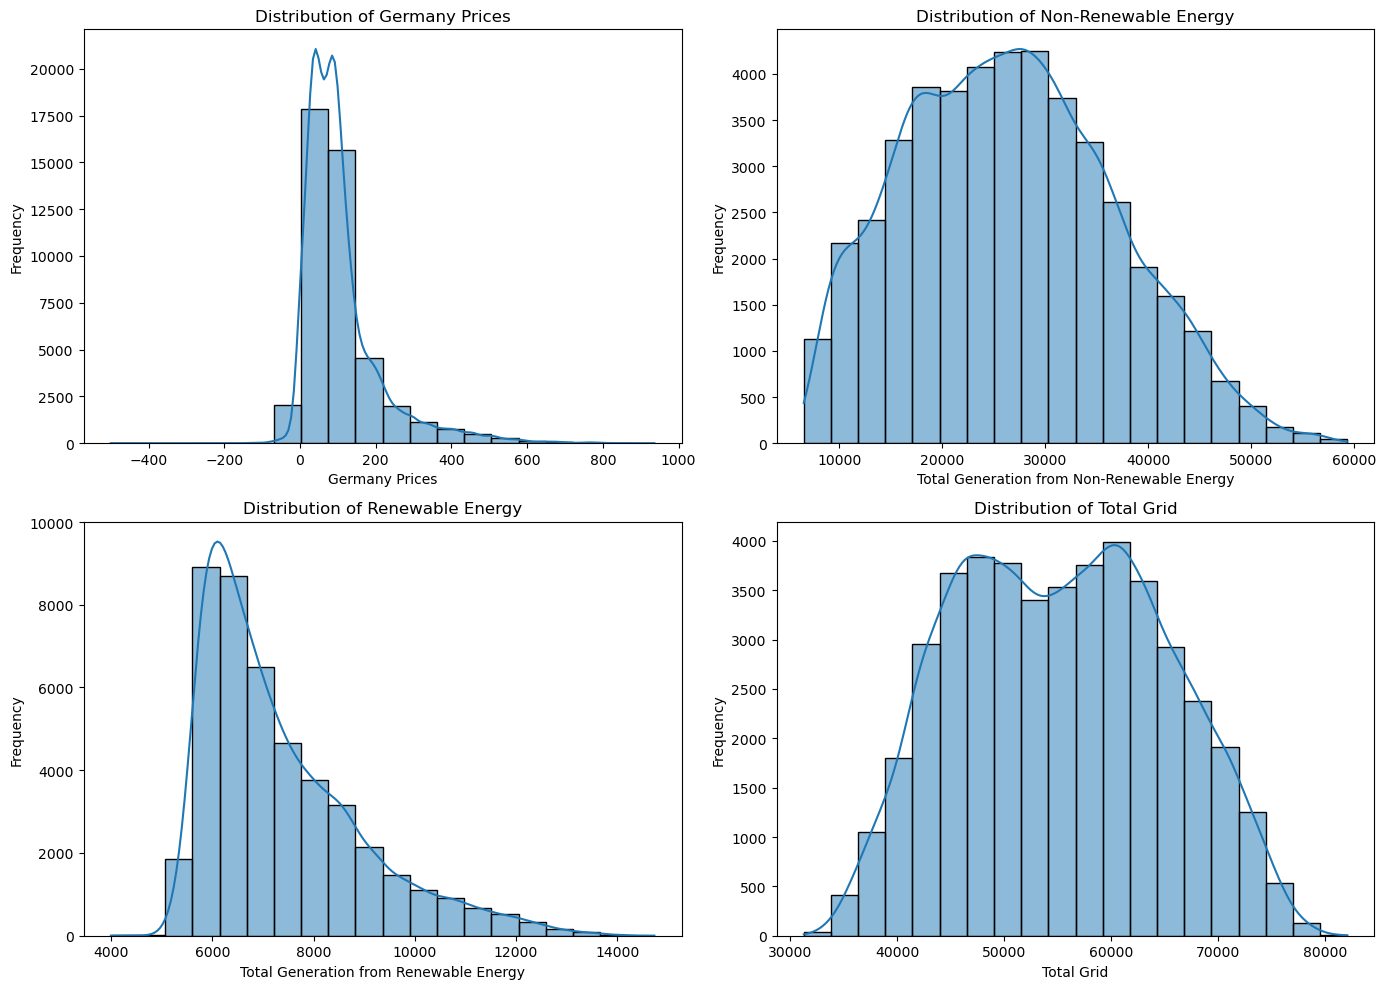

In [566]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# Plot 1: Distribution of Germany Prices
sns.histplot(df['Germany Prices'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Germany Prices")
axes[0, 0].set_xlabel("Germany Prices")
axes[0, 0].set_ylabel("Frequency")

# Plot 2: Distribution of Non-Renewable Energy
sns.histplot(df['Non-Renewable Energy'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Non-Renewable Energy")
axes[0, 1].set_xlabel("Total Generation from Non-Renewable Energy")
axes[0, 1].set_ylabel("Frequency")

# Plot 3: Distribution of Renewable Energy
sns.histplot(df['Renewable Energy'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Renewable Energy")
axes[1, 0].set_xlabel("Total Generation from Renewable Energy")
axes[1, 0].set_ylabel("Frequency")

# Plot 4: Distribution of Total Grid
sns.histplot(df['Total Grid'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Total Grid")
axes[1, 1].set_xlabel("Total Grid")
axes[1, 1].set_ylabel("Frequency")

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

In [567]:
df.drop(columns=['Day','Date','Month','Time','Year','Quarter'],inplace = True)

In [568]:
df.head()

,Renewable Energy,Non-Renewable Energy,Germany Prices,Total Grid,Residual Load,War Indicator,Hour,DayOfWeek
Start date,,,,,,,,
2020-01-01 00:00:00,7317.50,27179.25,41.88,43968.50,37334.25,0,0,2
2020-01-01 01:00:00,7181.75,26756.00,38.60,43047.00,35991.00,0,1,2
2020-01-01 02:00:00,8823.25,26526.75,36.55,41895.00,34458.00,0,2,2
2020-01-01 03:00:00,8958.50,26713.00,32.32,40701.75,33152.00,0,3,2
2020-01-01 04:00:00,8645.00,26713.00,30.85,40681.25,32930.75,0,4,2


In [569]:
for i in df.columns:    
    dt = df[i].astype(float).to_numpy()
    Q1=np.percentile(dt,25)
    Q3=np.percentile(dt,75)
    IQ=Q3-Q1
    upper=Q3+1.5*IQ
    lower=Q1-1.5*IQ

    dt[(dt[:]>upper) | (dt[:]<lower)]=np.nan
    df[i]=dt


In [570]:
df.isnull().sum()

0
Renewable Energy        1481
Non-Renewable Energy      76
Germany Prices          3465
Total Grid                 0
Residual Load             57
War Indicator              0
Hour                       0
DayOfWeek                  0
dtype: int64

In [571]:
# Filling the outliers using interpolation method
df=df.interpolate(method='linear', axis=0)
df.isna().sum()

0
Renewable Energy        0
Non-Renewable Energy    0
Germany Prices          0
Total Grid              0
Residual Load           0
War Indicator           0
Hour                    0
DayOfWeek               0
dtype: int64

Text(0.5, 1.0, 'Renewable Energy')

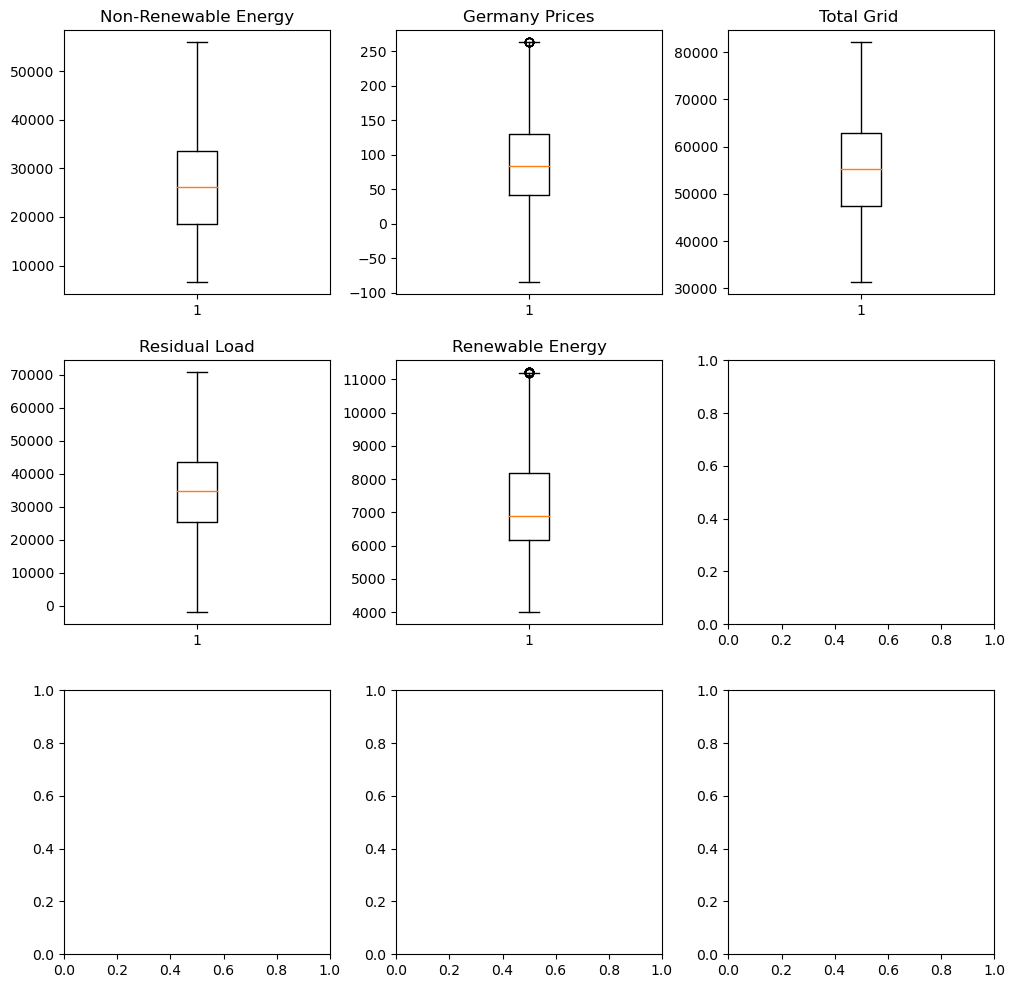

In [572]:
fig, ax = plt.subplots(3,3,figsize=(12,12))
fig.subplots_adjust(wspace=0.25, hspace=0.25)

ax[0][0].boxplot(df['Non-Renewable Energy'])
ax[0][0].set_title('Non-Renewable Energy')

ax[0][1].boxplot(df['Germany Prices'])
ax[0][1].set_title('Germany Prices')

ax[0][2].boxplot(df['Total Grid'])
ax[0][2].set_title('Total Grid ')

ax[1][0].boxplot(df['Residual Load'])
ax[1][0].set_title('Residual Load')

ax[1][1].boxplot(df['Renewable Energy'])
ax[1][1].set_title('Renewable Energy')


C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


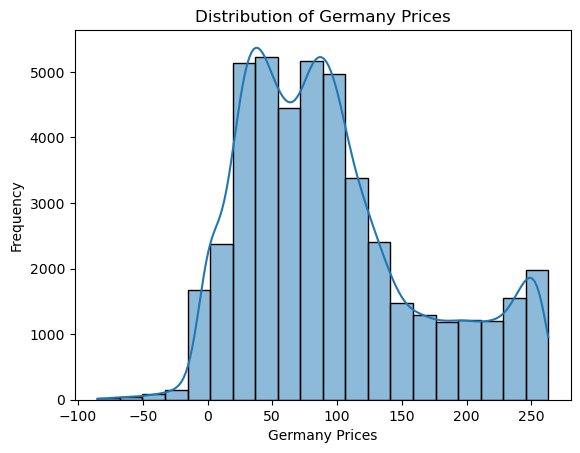

In [573]:
sns.histplot(df['Germany Prices'], bins=20, kde=True)
plt.title("Distribution of Germany Prices")
plt.xlabel("Germany Prices")
plt.ylabel("Frequency")
plt.show()

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


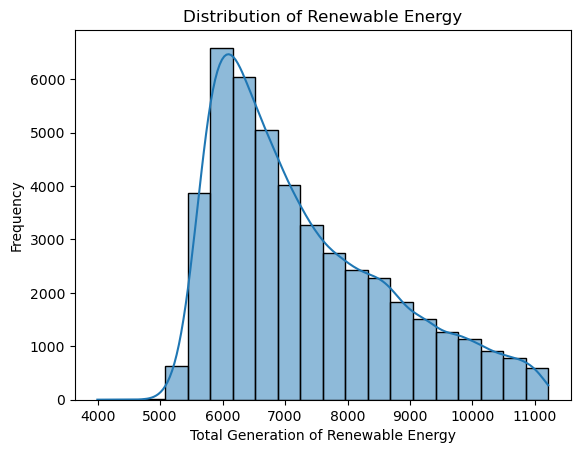

In [574]:
sns.histplot(df['Renewable Energy'], bins=20, kde=True)
plt.title("Distribution of Renewable Energy")
plt.xlabel("Total Generation of Renewable Energy")
plt.ylabel("Frequency")
plt.show()

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


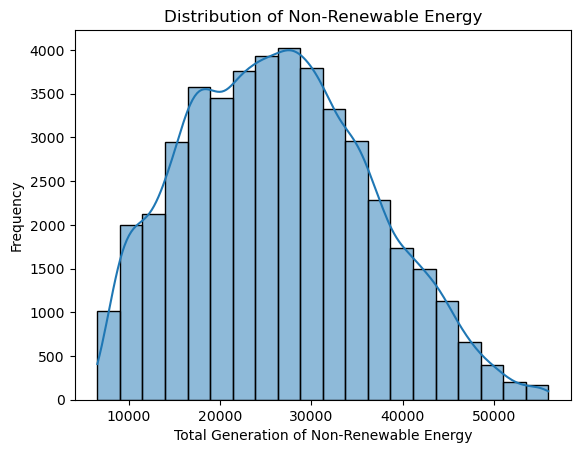

In [575]:
sns.histplot(df['Non-Renewable Energy'], bins=20, kde=True)
plt.title("Distribution of Non-Renewable Energy")
plt.xlabel("Total Generation of Non-Renewable Energy")
plt.ylabel("Frequency")
plt.show()

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


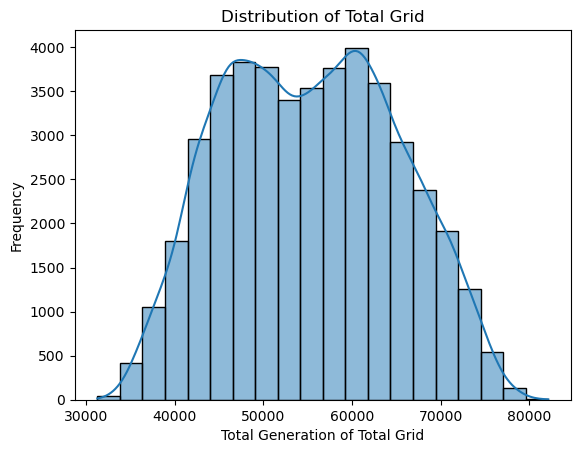

In [576]:
sns.histplot(df['Total Grid'], bins=20, kde=True)
plt.title("Distribution of Total Grid")
plt.xlabel("Total Generation of Total Grid")
plt.ylabel("Frequency")
plt.show()

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

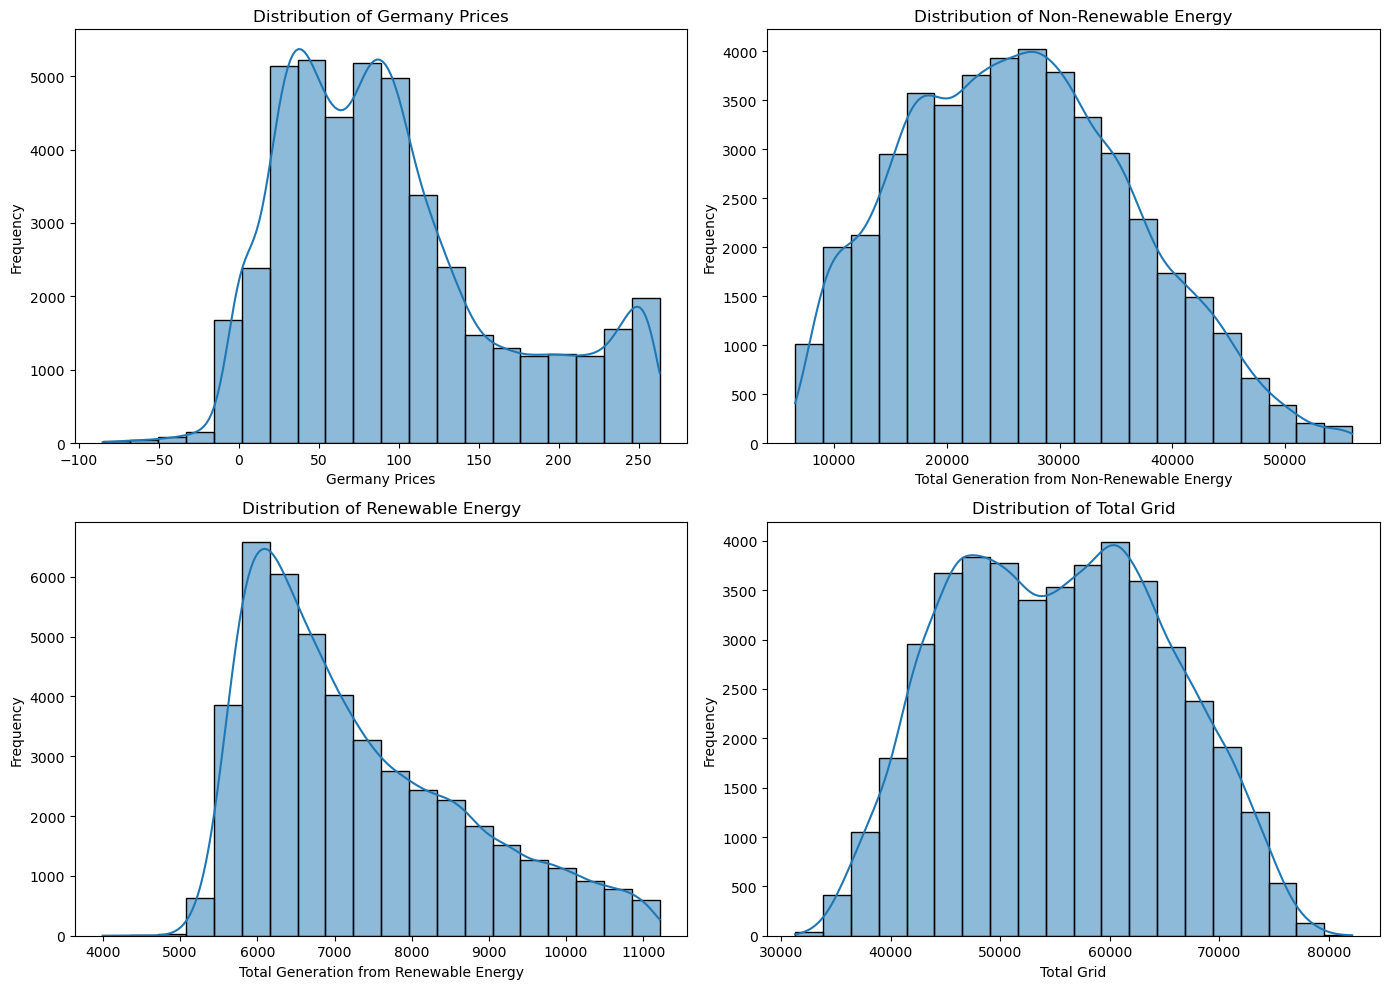

In [577]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# Plot 1: Distribution of Germany Prices
sns.histplot(df['Germany Prices'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Germany Prices")
axes[0, 0].set_xlabel("Germany Prices")
axes[0, 0].set_ylabel("Frequency")

# Plot 2: Distribution of Non-Renewable Energy
sns.histplot(df['Non-Renewable Energy'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Non-Renewable Energy")
axes[0, 1].set_xlabel("Total Generation from Non-Renewable Energy")
axes[0, 1].set_ylabel("Frequency")

# Plot 3: Distribution of Renewable Energy
sns.histplot(df['Renewable Energy'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Renewable Energy")
axes[1, 0].set_xlabel("Total Generation from Renewable Energy")
axes[1, 0].set_ylabel("Frequency")

# Plot 4: Distribution of Total Grid
sns.histplot(df['Total Grid'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Total Grid")
axes[1, 1].set_xlabel("Total Grid")
axes[1, 1].set_ylabel("Frequency")

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

Text(0.5, 1.0, 'Energy hourly germany prices')

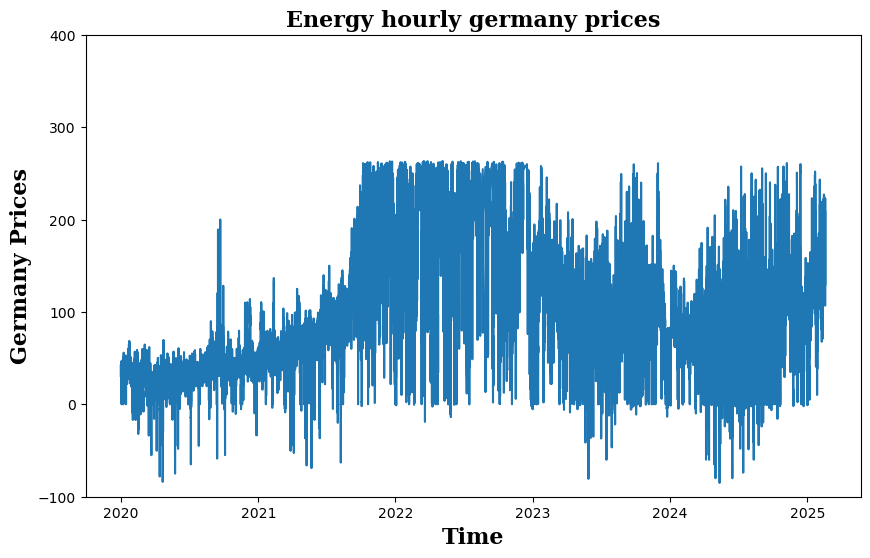

In [578]:
plt.figure(figsize=(10,6))
plt.plot(df['Germany Prices'])

plt.xlabel('Time',fontsize=16, fontweight='bold',fontfamily='serif')
plt.ylabel('Germany Prices',fontsize=16, fontweight='bold',fontfamily='serif')
plt.ylim(-100, 400)
plt.title('Energy hourly germany prices',fontsize=16, fontweight='bold',fontfamily='serif')

In [579]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44995 entries, 2020-01-01 00:00:00 to 2025-02-17 23:00:00
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Renewable Energy      44995 non-null  float64
 1   Non-Renewable Energy  44995 non-null  float64
 2   Germany Prices        44995 non-null  float64
 3   Total Grid            44995 non-null  float64
 4   Residual Load         44995 non-null  float64
 5   War Indicator         44995 non-null  float64
 6   Hour                  44995 non-null  float64
 7   DayOfWeek             44995 non-null  float64
dtypes: float64(8)
memory usage: 3.1 MB


In [580]:
df.drop(columns=['Hour','DayOfWeek'],inplace=True)

In [581]:
from statsmodels.tsa.stattools import adfuller

# Load the electricity price dataset
price_series = df["Germany Prices"]

# Perform the Augmented Dickey-Fuller Test
adf_test = adfuller(price_series)

# Display results
print("ADF Test Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:", adf_test[4])

# Check if the series is stationary
if adf_test[1] < 0.05:
    print("The data is stationary (reject H0).")
else:
    print("The data is non-stationary (fail to reject H0).")

ADF Test Statistic: -8.597132202907416
p-value: 7.02802256012202e-14
Critical Values: {'1%': -3.430495526582763, '5%': -2.861604319601196, '10%': -2.5668042352242724}
The data is stationary (reject H0).


# Preprocessing of the data (Normalization)

In [582]:
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler

In [583]:
features = df.drop(columns=['Germany Prices'])
target = df[['Germany Prices']]
features

,Renewable Energy,Non-Renewable Energy,Total Grid,Residual Load,War Indicator
Start date,,,,,
2020-01-01 00:00:00,7317.50,27179.25,43968.50,37334.25,0.0
2020-01-01 01:00:00,7181.75,26756.00,43047.00,35991.00,0.0
2020-01-01 02:00:00,8823.25,26526.75,41895.00,34458.00,0.0
2020-01-01 03:00:00,8958.50,26713.00,40701.75,33152.00,0.0
2020-01-01 04:00:00,8645.00,26713.00,40681.25,32930.75,0.0
...,...,...,...,...,...
2025-02-17 19:00:00,11206.25,41020.50,69697.25,63404.00,1.0
2025-02-17 20:00:00,9875.00,39690.00,66565.50,60146.00,1.0
2025-02-17 21:00:00,7901.25,38840.25,63781.25,57530.25,1.0


In [584]:
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

In [585]:
features_normalised = scaler_features.fit_transform(features)
target_normalised = scaler_target.fit_transform(target)
target_normalised

array([[0.36465993],
       [0.35523897],
       [0.34935087],
       ...,
       [0.69011374],
       [0.64473231],
       [0.61652688]])

In [586]:
dt_arr_normalised = np.hstack((features_normalised, target_normalised))
dt_arr_normalised.shape

(44995, 6)

In [587]:
dt_arr_normalised[1]

array([0.44148826, 0.40901661, 0.23149742, 0.52227054, 0.        ,
       0.35523897])

# Reconstruction of the data for LSTM

In [588]:
target_column = 'Germany Prices'
target_index = df.columns.get_loc(target_column)
target_index

2

In [589]:
def create_dataset(df,time_window):
    X,Y=[],[]
    for i in range(time_window, len(df)):
            X.append(df[i - time_window:i, 0:df.shape[1]])
            Y.append(df[i,-1])
    return np.array(X),np.array(Y)
    

In [590]:
train_size = int(0.75 * len(df))
df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]
df_test.head()

,Renewable Energy,Non-Renewable Energy,Germany Prices,Total Grid,Residual Load,War Indicator
Start date,,,,,,
2023-11-07 06:00:00,7140.00,20559.50,101.28,59942.25,29487.25,1.0
2023-11-07 07:00:00,10707.25,22138.75,132.89,64943.75,34811.50,1.0
2023-11-07 08:00:00,9951.00,21549.00,136.05,67252.25,34316.75,1.0
2023-11-07 09:00:00,7801.50,21080.00,114.93,67843.00,31042.00,1.0
2023-11-07 10:00:00,6492.25,19997.50,99.45,68083.75,28721.50,1.0


In [591]:
# Splitting the data into train and test
dt_train, dt_test= dt_arr_normalised[0:round(0.75*len(dt_arr_normalised))] ,  dt_arr_normalised[round(0.75*len(dt_arr_normalised)):]   
dt_train.shape,dt_test.shape

((33746, 6), (11249, 6))

In [592]:
time_window = 24
target_index = -1

In [593]:
dt_train

array([[0.46029931, 0.41758481, 0.2496238 , 0.54072799, 0.        ,
        0.36465993],
       [0.44148826, 0.40901661, 0.23149742, 0.52227054, 0.        ,
        0.35523897],
       [0.66895309, 0.40437571, 0.20883698, 0.50120576, 0.        ,
        0.34935087],
       ...,
       [0.23058269, 0.15950625, 0.31209737, 0.23856243, 1.        ,
        0.43971163],
       [0.24468233, 0.16983567, 0.34177526, 0.26958592, 1.        ,
        0.44614545],
       [0.26668052, 0.20561665, 0.40363905, 0.31690954, 1.        ,
        0.48377183]])

In [594]:
X_train,Y_train=create_dataset(dt_train, time_window)
X_test, Y_test=create_dataset(dt_test,time_window)

In [595]:
X_train.shape,Y_train.shape,Y_train.shape,Y_test.shape

((33722, 24, 6), (33722,), (33722,), (11225,))

In [596]:
X_test.shape,Y_test.shape

((11225, 24, 6), (11225,))

In [597]:
Y_test

array([0.48707491, 0.55348116, 0.56453929, ..., 0.69011374, 0.64473231,
       0.61652688])

# Defining the model

In [598]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [599]:
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dense(1,'linear'))
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100)               42800     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 42901 (167.58 KB)
Trainable params: 42901 (167.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [600]:
model_loss=model.fit(X_train,Y_train,epochs=5,validation_split=0.2)

Epoch 1/5
844/844 [==============================] - 16s 17ms/step - loss: 0.0068 - val_loss: 0.0014
Epoch 2/5
844/844 [==============================] - 15s 18ms/step - loss: 0.0012 - val_loss: 0.0029
Epoch 3/5
844/844 [==============================] - 16s 18ms/step - loss: 9.8374e-04 - val_loss: 0.0016
Epoch 4/5
844/844 [==============================] - 15s 18ms/step - loss: 9.4817e-04 - val_loss: 0.0010
Epoch 5/5
844/844 [==============================] - 16s 18ms/step - loss: 9.0269e-04 - val_loss: 9.4756e-04


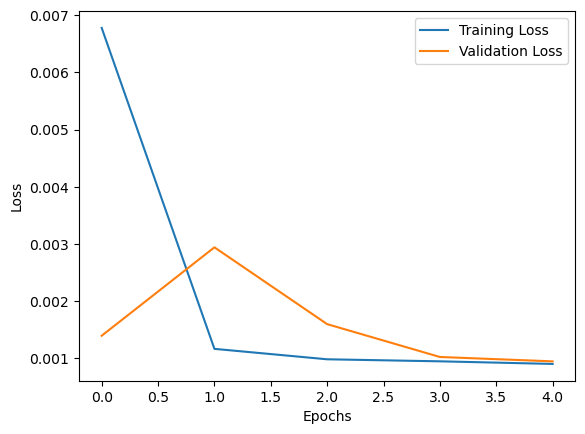

In [601]:
plt.plot(model_loss.history['loss'], label='Training Loss')
plt.plot(model_loss.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [602]:
Y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_mae = mean_absolute_error(Y_train, Y_train_pred)

1054/1054 [==============================] - 7s 7ms/step


In [603]:
train_mse,train_mae

(0.0008155663222204847, 0.01802062088217018)

In [604]:
Y_pred=model.predict(X_test)

351/351 [==============================] - 2s 7ms/step


In [605]:
Y_pred.shape

(11225, 1)

In [606]:
print ('R-Squared:',r2_score(Y_test,Y_pred))
print ('Mean squared error:', mean_squared_error (Y_pred, Y_test))
print('Mean absolute error',mean_absolute_error(Y_pred,Y_test))
print('Mean absolute percentage error',mean_absolute_percentage_error(Y_pred,Y_test))

R-Squared: 0.9373098062568184
Mean squared error: 0.0010868343323255831
Mean absolute error 0.022723112935264033
Mean absolute percentage error 0.05170676906378512


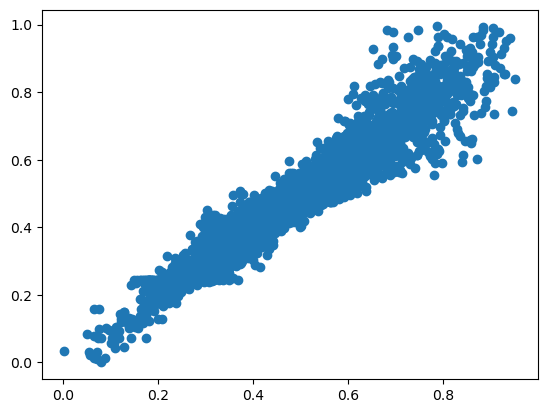

In [607]:
plt.scatter(Y_pred, Y_test)

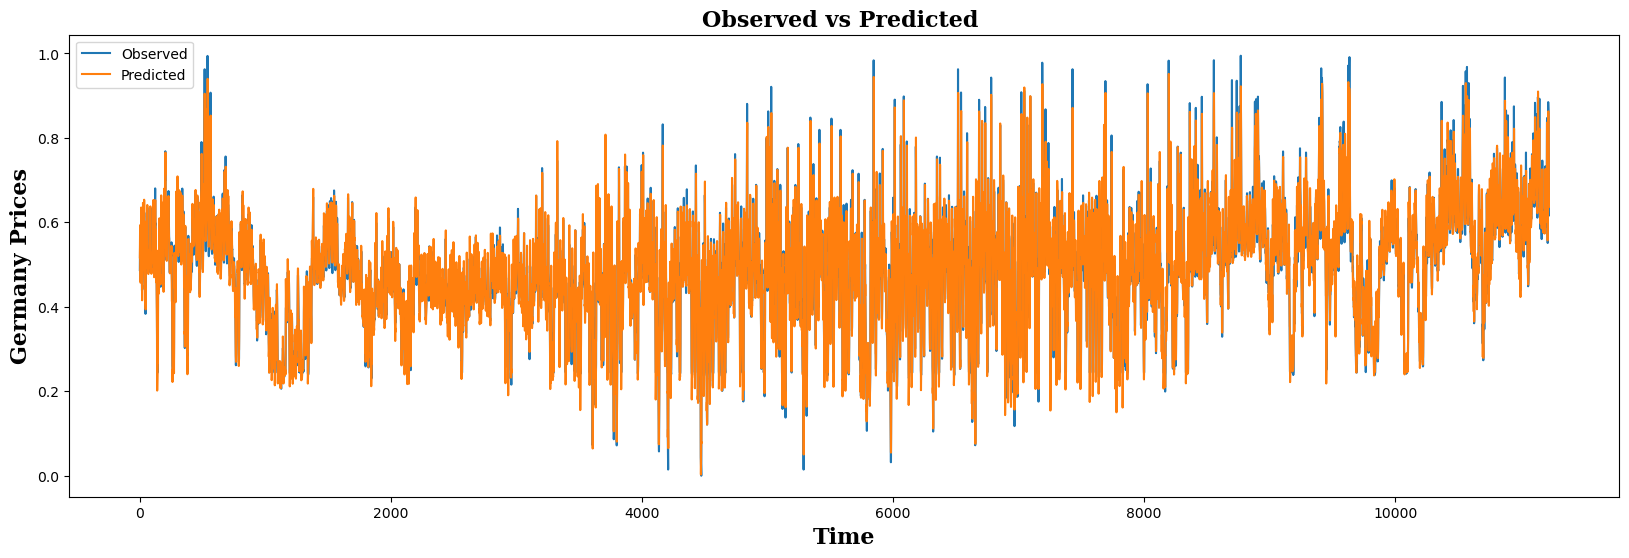

In [608]:
plt.figure(figsize=(20,6))

plt.plot(Y_test)
plt.plot(Y_pred)

plt.xlabel('Time',fontsize=16, fontweight='bold',fontfamily='serif')
plt.ylabel('Germany Prices',fontsize=16, fontweight='bold',fontfamily='serif')
plt.title('Observed vs Predicted ',fontsize=16, fontweight='bold',fontfamily='serif')
plt.legend(['Observed','Predicted'])

In [609]:
Y_pred_inverse = scaler_target.inverse_transform(Y_pred)
Y_test_inverse = scaler_target.inverse_transform(Y_test.reshape(-1, 1))

In [610]:
df_test.info()
Y_test_inverse.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11249 entries, 2023-11-07 06:00:00 to 2025-02-17 23:00:00
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Renewable Energy      11249 non-null  float64
 1   Non-Renewable Energy  11249 non-null  float64
 2   Germany Prices        11249 non-null  float64
 3   Total Grid            11249 non-null  float64
 4   Residual Load         11249 non-null  float64
 5   War Indicator         11249 non-null  float64
dtypes: float64(6)
memory usage: 615.2 KB


(11225, 1)

<Axes: xlabel='Start date'>

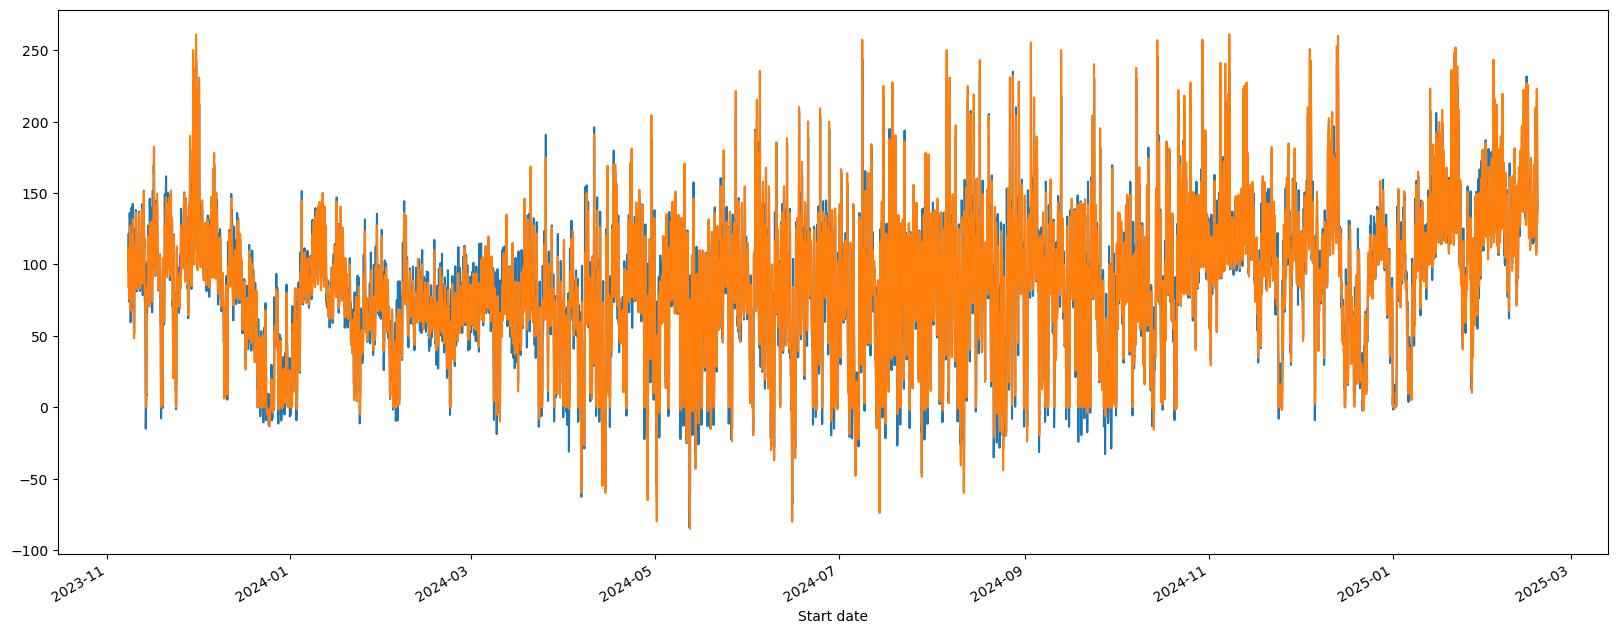

In [611]:
df_test = df.iloc[train_size+24:].copy()
df_test['Y_test_inverse'] = Y_test_inverse
df_test['Y_pred_inverse'] = Y_pred_inverse
df_test['Y_pred_inverse'].plot(figsize=(20,8))
df_test['Y_test_inverse'].plot(figsize=(20,8))

In [616]:
df_test['Y_pred_inverse'].tail(24).tolist()

[132.90179443359375,
 128.82565307617188,
 124.48117065429688,
 126.9977798461914,
 134.2230682373047,
 139.99810791015625,
 147.64964294433594,
 169.1787567138672,
 205.9821014404297,
 198.16143798828125,
 154.3185577392578,
 126.08438110351562,
 109.02127838134766,
 108.95576477050781,
 114.09234619140625,
 124.76345825195312,
 152.9398193359375,
 176.82992553710938,
 215.31240844726562,
 197.73390197753906,
 187.9882049560547,
 157.9820098876953,
 144.08074951171875,
 136.6332244873047]

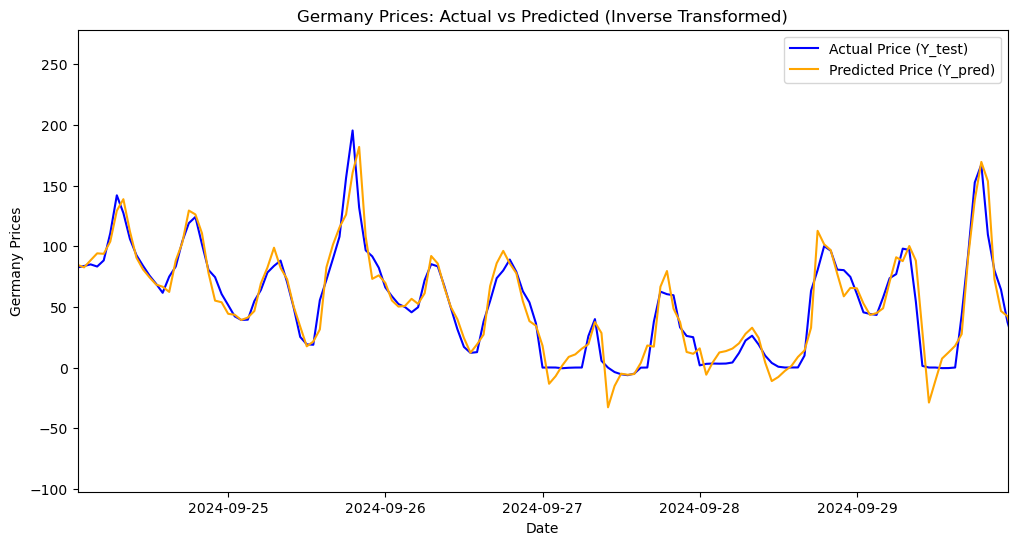

In [613]:
plt.figure(figsize=(12, 6))
plt.plot(df_test.index, df_test['Y_test_inverse'], label='Actual Price (Y_test)', color='blue')
plt.plot(df_test.index, df_test['Y_pred_inverse'], label='Predicted Price (Y_pred)', color='orange')
plt.xlim([pd.to_datetime('2024-09-24 01:00:00'),pd.to_datetime('2024-09-29 23:00:00')])
plt.xlabel('Date')
plt.ylabel('Germany Prices')
plt.title('Germany Prices: Actual vs Predicted (Inverse Transformed)')
plt.legend()
plt.show()

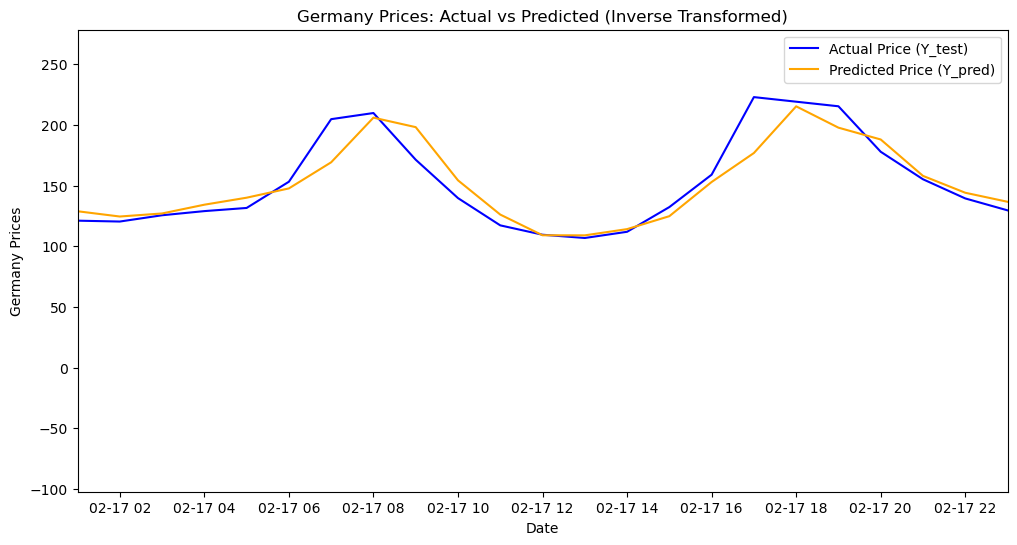

In [614]:
plt.figure(figsize=(12, 6))
plt.plot(df_test.index, df_test['Y_test_inverse'], label='Actual Price (Y_test)', color='blue')
plt.plot(df_test.index, df_test['Y_pred_inverse'], label='Predicted Price (Y_pred)', color='orange')
plt.xlim([pd.to_datetime('2025-02-17 01:00:00'),pd.to_datetime('2025-02-17 23:00:00')])
plt.xlabel('Date')
plt.ylabel('Germany Prices')
plt.title('Germany Prices: Actual vs Predicted (Inverse Transformed)')
plt.legend()
plt.show()

In [615]:
df_24_old = df.iloc[-24:,:]
df_24_old

,Renewable Energy,Non-Renewable Energy,Germany Prices,Total Grid,Residual Load,War Indicator
Start date,,,,,,
2025-02-17 00:00:00,5650.250000,30947.25,128.05,51221.75,43117.50,1.0
2025-02-17 01:00:00,5628.250000,30698.50,121.06,49940.50,42404.75,1.0
2025-02-17 02:00:00,5605.750000,31005.00,120.34,49232.50,42446.50,1.0
2025-02-17 03:00:00,5524.750000,31496.00,125.52,49220.75,42918.50,1.0
2025-02-17 04:00:00,5557.500000,32449.25,128.94,50669.00,44548.25,1.0
2025-02-17 05:00:00,5634.750000,35068.50,131.54,54746.25,48577.50,1.0
2025-02-17 06:00:00,7728.750000,37222.25,153.16,63355.75,56910.50,1.0
2025-02-17 07:00:00,7920.916667,38070.75,204.74,69401.50,62705.00,1.0
2025-02-17 08:00:00,8113.083333,38595.50,209.79,72134.75,60992.00,1.0


In [419]:
df_consumf = pd.read_excel("future/Actual_consumption.xlsx")
df_consumf = df_consumf.drop(index=range(0, 8))
df_consumf = df_consumf.reset_index(drop=True)
new_header = df_consumf.iloc[0]
df_consumf = df_consumf[1:]
df_consumf.columns = new_header
df_consumf.head()

C:\Users\asus\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Start date,End date,grid load [MWh],Grid load incl. hydro pumped storage [MWh],Hydro pumped storage [MWh],Residual load [MWh]
1,"Feb 18, 2025 12:00 AM","Feb 18, 2025 1:00 AM",55598.75,56053,454.25,49292.25
2,"Feb 18, 2025 1:00 AM","Feb 18, 2025 2:00 AM",54020.75,54830,809.25,47421
3,"Feb 18, 2025 2:00 AM","Feb 18, 2025 3:00 AM",52964,54508.75,1544.75,46036.75
4,"Feb 18, 2025 3:00 AM","Feb 18, 2025 4:00 AM",53553,55687.75,2134.75,46316.75
5,"Feb 18, 2025 4:00 AM","Feb 18, 2025 5:00 AM",54974.25,56573.75,1599.5,47104.75


In [420]:
def convert_to_float(x):
    try:
        return float(x)
    except ValueError:
        return np.nan
    
columns_to_convert = ['grid load [MWh]', 'Residual load [MWh]']
for col in columns_to_convert:
    df_consum[col] = df_consum[col].apply(convert_to_float)

In [421]:
df_generatef = pd.read_excel("future/Actual_generation.xlsx")
df_generatef = df_generatef.drop(index=range(0, 8))
df_generatef = df_generatef.reset_index(drop=True)
new_header = df_generatef.iloc[0]
df_generatef = df_generatef[1:]
df_generatef.columns = new_header

C:\Users\asus\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [422]:
columns_to_convertf = ['Biomass [MWh]','Hydropower [MWh]','Wind offshore [MWh]','Wind onshore [MWh]','Photovoltaics [MWh]','Other renewable [MWh]','Nuclear [MWh]','Lignite [MWh]','Hard coal [MWh]','Fossil gas [MWh]','Hydro pumped storage [MWh]','Other conventional [MWh]']
for col in columns_to_convertf:
    df_generatef[col] = df_generatef[col].apply(convert_to_float)

In [423]:
cols_renewf = ['Biomass [MWh]','Hydropower [MWh]','Other renewable [MWh]','Hydro pumped storage [MWh]']
cols_nonrenewf = ['Nuclear [MWh]','Lignite [MWh]','Hard coal [MWh]','Fossil gas [MWh]','Other conventional [MWh]']
df_generatef['Renewable Energy'] = df_generatef.drop(columns=['Start date', 'End date'])[cols_renewf].sum(axis=1)
df_generatef['Non-Renewable Energy'] = df_generatef.drop(columns=['Start date', 'End date'])[cols_nonrenewf].sum(axis=1)

In [424]:
df_generationf = df_generatef[['Start date', 'End date', 'Renewable Energy', 'Non-Renewable Energy']]

In [428]:
df_24_future = pd.merge(df_generationf,df_consumf[['Start date','grid load [MWh]','Residual load [MWh]']],on = 'Start date')
df_24_future = df_24_future.rename(columns={'grid load [MWh]': 'Total Grid','Residual load [MWh]':'Residual Load'})
df_24_future['Start date'] = pd.to_datetime(df_24_future['Start date'])
war_start_date = pd.Timestamp("2022-02-24")
df_24_future["War Indicator"] = (df_24_future["Start date"] >= war_start_date).astype(int)
df_24_future.drop(columns={'End date'},inplace=True)
df_24_future.set_index('Start date',inplace=True)
df_24_future.index = pd.to_datetime(df_24_future.index, errors='coerce')
df_24_future.head(5)

C:\Users\asus\AppData\Local\Temp\ipykernel_13056\27015019.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_24_future['Start date'] = pd.to_datetime(df_24_future['Start date'])


,Renewable Energy,Non-Renewable Energy,Total Grid,Residual Load,War Indicator
Start date,,,,,
2025-02-18 00:00:00,5944.75,34606.00,55598.75,49292.25,1
2025-02-18 01:00:00,5766.25,33712.75,54020.75,47421,1
2025-02-18 02:00:00,5804.25,33940.50,52964,46036.75,1
2025-02-18 03:00:00,5699.75,33461.25,53553,46316.75,1
2025-02-18 04:00:00,5814.75,33856.00,54974.25,47104.75,1


In [429]:
df_24_future['Germany Prices']=0
df_24_future

,Renewable Energy,Non-Renewable Energy,Total Grid,Residual Load,War Indicator,Germany Prices
Start date,,,,,,
2025-02-18 00:00:00,5944.75,34606.00,55598.75,49292.25,1,0
2025-02-18 01:00:00,5766.25,33712.75,54020.75,47421,1,0
2025-02-18 02:00:00,5804.25,33940.50,52964,46036.75,1,0
2025-02-18 03:00:00,5699.75,33461.25,53553,46316.75,1,0
2025-02-18 04:00:00,5814.75,33856.00,54974.25,47104.75,1,0
2025-02-18 05:00:00,5779.50,34980.50,58206.25,49502.5,1,0
2025-02-18 06:00:00,6947.50,37595.50,64936.25,55380.5,1,0
2025-02-18 07:00:00,10465.75,38687.25,70370.5,59380.75,1,0
2025-02-18 08:00:00,9930.25,38509.25,73280.5,55856.5,1,0


In [430]:
features_old = df_24_old.drop(columns=['Germany Prices'])
target_old = df_24_old[['Germany Prices']]
features_old

,Renewable Energy,Non-Renewable Energy,Total Grid,Residual Load,War Indicator
Start date,,,,,
2025-02-17 00:00:00,5650.250000,30947.25,51221.75,43117.50,1.0
2025-02-17 01:00:00,5628.250000,30698.50,49940.50,42404.75,1.0
2025-02-17 02:00:00,5605.750000,31005.00,49232.50,42446.50,1.0
2025-02-17 03:00:00,5524.750000,31496.00,49220.75,42918.50,1.0
2025-02-17 04:00:00,5557.500000,32449.25,50669.00,44548.25,1.0
2025-02-17 05:00:00,5634.750000,35068.50,54746.25,48577.50,1.0
2025-02-17 06:00:00,7728.750000,37222.25,63355.75,56910.50,1.0
2025-02-17 07:00:00,7920.916667,38070.75,69401.50,62705.00,1.0
2025-02-17 08:00:00,8113.083333,38595.50,72134.75,60992.00,1.0


In [431]:
features_scaled=scaler_features.fit_transform(features_old)
target_scaled=scaler_target.fit_transform(target_old)

In [432]:
df_24_old_normalised=np.hstack((features_scaled,target_scaled)) 

In [433]:
features_future = df_24_future.drop(columns=['Germany Prices'])
target_future = df_24_future[['Germany Prices']]

In [434]:
feature_scaled_f=scaler_features.fit_transform(features_future)
# target_scaled_f=scaler_target.fit_transform(target_future)

In [435]:
df_24_future_normalised=np.hstack((feature_scaled_f,target_scaled))

In [436]:
df_24_future_normalised,df_24_old_normalised

(array([[0.05024122, 0.6856224 , 0.12860908, 0.68649782, 0.        ,
         0.18314104],
        [0.01544759, 0.61681559, 0.05158275, 0.62834835, 0.        ,
         0.12295505],
        [0.02285464, 0.63435911, 0.        , 0.5853325 , 0.        ,
         0.11675564],
        [0.00248526, 0.59744261, 0.02875064, 0.59403356, 0.        ,
         0.16135698],
        [0.02490132, 0.6278501 , 0.09812559, 0.61852082, 0.        ,
         0.1908042 ],
        [0.01803031, 0.71447004, 0.25588802, 0.69303139, 0.        ,
         0.21319098],
        [0.24569953, 0.91590279, 0.58439704, 0.87569142, 0.        ,
         0.39934562],
        [0.93148482, 1.        , 0.84965709, 1.        , 0.        ,
         0.84346478],
        [0.82710394, 0.98628871, 0.99170185, 0.89048322, 0.        ,
         0.88694679],
        [0.23395546, 0.80330458, 1.        , 0.63934897, 0.        ,
         0.55553642],
        [0.0763608 , 0.56715067, 0.97129817, 0.40539932, 0.        ,
         0.2831927 ],

In [437]:
future_scaled_df=pd.DataFrame(df_24_future_normalised)
future_scaled_df.iloc[:,-1]=np.nan

In [438]:
full_df=pd.concat([pd.DataFrame(df_24_old_normalised),future_scaled_df]).reset_index().drop(["index"],axis=1)

In [439]:
full_df

,0,1,2,3,4,5
0,0.022089,0.032073,0.085908,0.220373,0.0,0.183141
1,0.018217,0.009536,0.030901,0.195354,0.0,0.122955
2,0.014257,0.037305,0.000504,0.196820,0.0,0.116756
3,0.000000,0.081791,0.000000,0.213388,0.0,0.161357
4,0.005764,0.168158,0.062177,0.270593,0.0,0.190804
5,0.019361,0.405468,0.237225,0.412024,0.0,0.213191
6,0.387926,0.600603,0.606854,0.704520,0.0,0.399346
7,0.421749,0.677479,0.866415,0.907913,0.0,0.843465
8,0.455572,0.725022,0.983761,0.847785,0.0,0.886947
9,0.489395,0.594804,1.000000,0.604368,0.0,0.555536


In [440]:
full_df_scaled_array=full_df.values
full_df_scaled_array.shape[1]

6

In [441]:
full_df_scaled_array=full_df.values
all_data=[]
time_step=24
for i in range(time_step,len(full_df_scaled_array)):
    data_x=[]
    data_x.append(
    full_df_scaled_array[i-time_step :i , 0:full_df_scaled_array.shape[1]])
    data_x=np.array(data_x)
    prediction=model.predict(data_x)
    all_data.append(prediction)
    full_df.iloc[i,-1]=prediction

1/1 [==============================] - 0s 23ms/step


In [442]:
new_array=np.array(all_data).reshape(-1,1)
# new_array=new_array.reshape(-1,1)
# prediction_copies_array = np.repeat(new_array,4, axis=-1)
y_pred_future_24 = scaler_target.inverse_transform(new_array).flatten()

In [443]:
df_24_future['Germany Prices'] = y_pred_future_24
df_24_future

,Renewable Energy,Non-Renewable Energy,Total Grid,Residual Load,War Indicator,Germany Prices
Start date,,,,,,
2025-02-18 00:00:00,5944.75,34606.00,55598.75,49292.25,1,130.380646
2025-02-18 01:00:00,5766.25,33712.75,54020.75,47421,1,140.163696
2025-02-18 02:00:00,5804.25,33940.50,52964,46036.75,1,145.172958
2025-02-18 03:00:00,5699.75,33461.25,53553,46316.75,1,149.456909
2025-02-18 04:00:00,5814.75,33856.00,54974.25,47104.75,1,153.275925
2025-02-18 05:00:00,5779.50,34980.50,58206.25,49502.5,1,158.386688
2025-02-18 06:00:00,6947.50,37595.50,64936.25,55380.5,1,166.403290
2025-02-18 07:00:00,10465.75,38687.25,70370.5,59380.75,1,180.162262
2025-02-18 08:00:00,9930.25,38509.25,73280.5,55856.5,1,184.616623
